In [242]:
#eda visa datasheet


In [244]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
%matplotlib inline
# To display maximum columns of dataframe on screen
pd.pandas.set_option('display.max_columns', None)

In [246]:
visa=pd.read_csv('data\\Visadataset.csv')
visa.head()


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [248]:
#data types
visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [250]:
#shape to display number of rows and columns
visa.shape

(25480, 12)

In [278]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numeric_feat = numerical_columns_selector(visa)
categorical_feat = categorical_columns_selector(visa)

In [280]:
numeric_feat

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [282]:
categorical_feat

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [284]:

visa[numeric_feat].head()

,no_of_employees,yr_of_estab,prevailing_wage
0,14513,2007,592.2029
1,2412,2002,83425.6500
2,44444,2008,122996.8600
3,98,1897,83434.0300
4,1082,2005,149907.3900


In [286]:
discrete_numeric_feats=[feat for feat in numeric_feat if len(visa[feat].unique())<25]

In [288]:
discrete_numeric_feats

[]

In [290]:
continuous_numeric_feats=[feat for feat in numeric_feat if len(visa[feat].unique())>25]
continuous_numeric_feats

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [292]:
visa[categorical_feat]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,West,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,Northeast,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,West,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,West,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,South,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,South,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,Northeast,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,South,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,West,Year,Y,Certified


In [294]:
missing_val=[feat for feat in visa.columns if visa[feat].isnull().sum()>1]

In [296]:
missing_val


[]

In [298]:
#Mean of the numeric features
visa[numeric_feat].mean()

no_of_employees     5667.043210
yr_of_estab         1979.409929
prevailing_wage    74455.814592
dtype: float64

In [300]:

#Median of the numeric features
visa[numeric_feat].median()

no_of_employees     2109.00
yr_of_estab         1997.00
prevailing_wage    70308.21
dtype: float64

In [302]:
#Mode of the numeric features
visa[numeric_feat].mode().loc[0]

no_of_employees     183.00
yr_of_estab        1998.00
prevailing_wage     100.66
Name: 0, dtype: float64

In [304]:
#Variance
round(visa[numeric_feat].var(),2)

no_of_employees    5.233996e+08
yr_of_estab        1.794960e+03
prevailing_wage    2.789524e+09
dtype: float64

In [306]:
# Standard Deviation
visa[numeric_feat].std()

no_of_employees    22877.928848
yr_of_estab           42.366929
prevailing_wage    52815.942327
dtype: float64

In [308]:
visa[numeric_feat].cov()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,5.233996e+08,-17224.155003,-1.150624e+07
yr_of_estab,-1.722416e+04,1794.956681,2.761653e+04
prevailing_wage,-1.150624e+07,27616.530171,2.789524e+09


In [310]:
#Pearson correlation coefficient
visa[numeric_feat].corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [312]:
# 2. Spearman's rank correlation coefficient
visa[numeric_feat].corr(method='spearman')

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.006214,-0.015197
yr_of_estab,-0.006214,1.000000,0.019566
prevailing_wage,-0.015197,0.019566,1.000000


In [314]:
# 3. kendall rank correlation coefficient
visa[numeric_feat].corr(method='kendall')

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.004180,-0.010159
yr_of_estab,-0.004180,1.000000,0.013151
prevailing_wage,-0.010159,0.013151,1.000000


In [316]:
for feat in numeric_feat:
 print("Five Point Summary for {}".format(feat))
 print("1. Minimum value is: {}".format(visa[feat].min()))
 print("2. 1st quartile is: {}".format(np.percentile(visa[feat], 25)))
 print("3. Median is: {}".format(np.percentile(visa[feat], 50)))
 print("4. 3rd quartile is: {}".format(np.percentile(visa[feat], 75)))
 print("5. Maximum value is: {}".format(visa[feat].max()))
 print(" ")


Five Point Summary for no_of_employees
1. Minimum value is: -26
2. 1st quartile is: 1022.0
3. Median is: 2109.0
4. 3rd quartile is: 3504.0
5. Maximum value is: 602069
 
Five Point Summary for yr_of_estab
1. Minimum value is: 1800
2. 1st quartile is: 1976.0
3. Median is: 1997.0
4. 3rd quartile is: 2005.0
5. Maximum value is: 2016
 
Five Point Summary for prevailing_wage
1. Minimum value is: 2.1367
2. 1st quartile is: 34015.479999999996
3. Median is: 70308.20999999999
4. 3rd quartile is: 107735.51250000001
5. Maximum value is: 319210.27
 


In [318]:
visa[categorical_feat].mode()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,Bachelor's,Y,N,Northeast,Year,Y,Certified
1,EZYV02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EZYV03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EZYV04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EZYV05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
25475,EZYV9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25476,EZYV9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25477,EZYV9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25478,EZYV9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


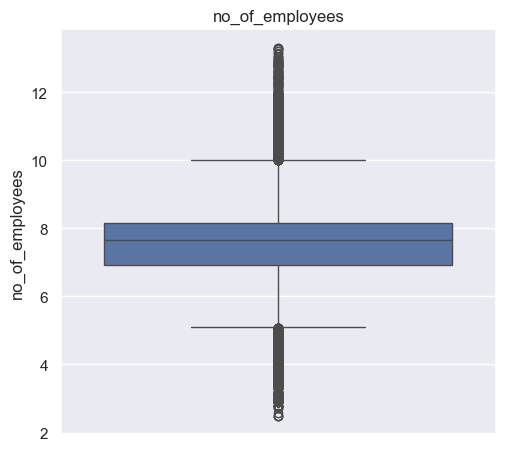

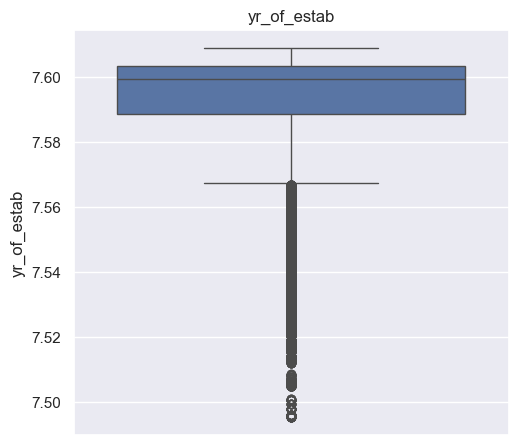

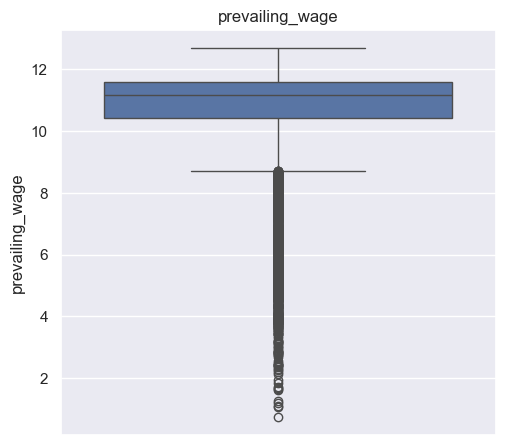

In [322]:
sns.set(rc={'figure.figsize':(5,5)})
for feat in continuous_numeric_feats:
 visa_copy=visa.copy()
 # here we are ignoring all zero values,since log(0) is undefined
 if 0 in visa_copy[feat].unique():
     pass
 else:
     visa_copy[feat]=np.log(visa_copy[feat])
     sns.boxplot(data=visa_copy[feat])
     plt.ylabel(feat)
     plt.title(feat)
     plt.show()

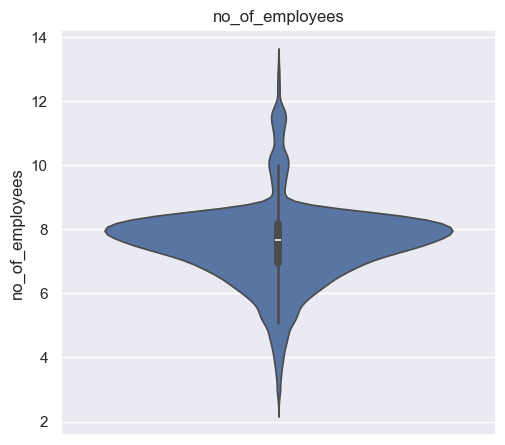

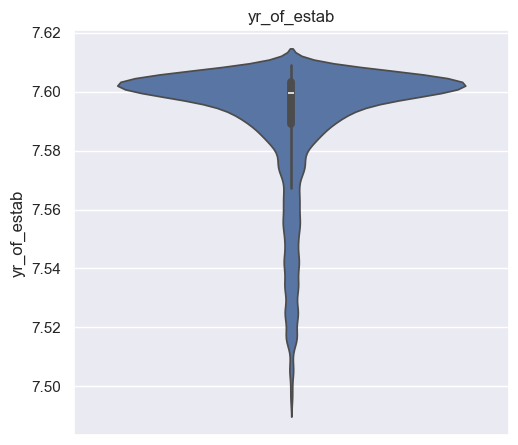

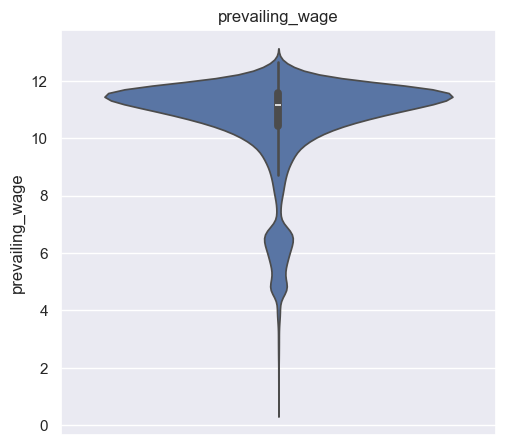

In [328]:
# violin plot for checking outliers
sns.set(rc={'figure.figsize':(5,5)})
for feat in continuous_numeric_feats:
 visa_copy=visa.copy()
 # here we are ignoring all zero values,since log(0) is undefined
 if 0 in visa_copy[feat].unique():
     pass
 else:
    visa_copy[feat]=np.log(visa_copy[feat])
    sns.violinplot(data=visa_copy[feat])
    plt.ylabel(feat)
    plt.title(feat)
    plt.show()

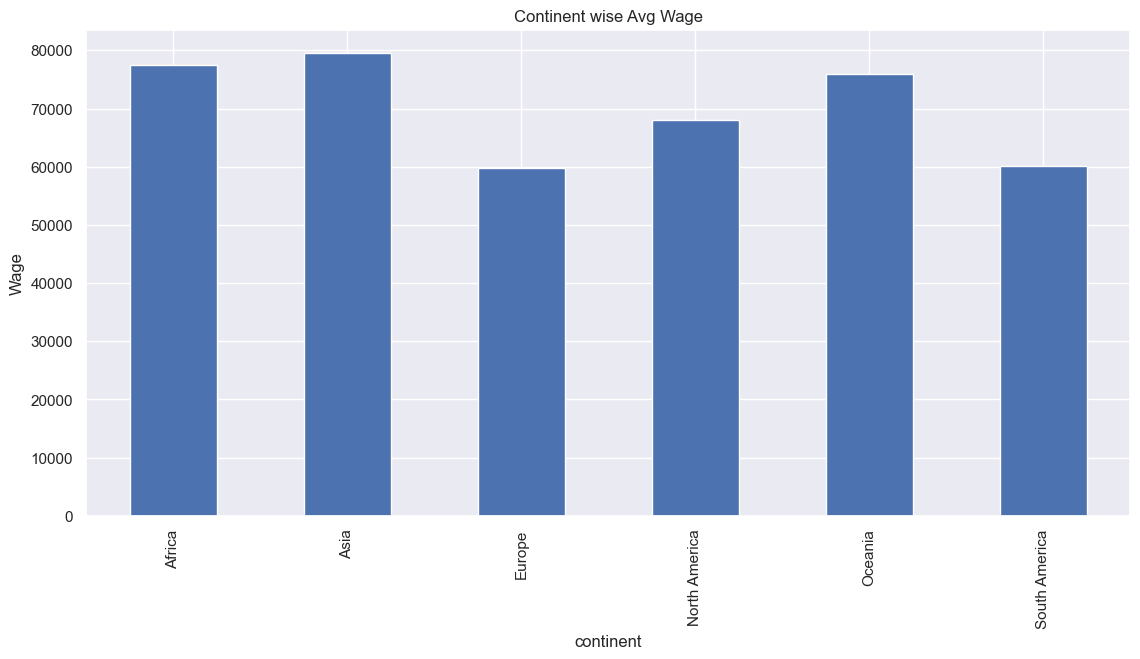

In [336]:
#continent wise mean salary
visa_copy=visa.copy()
visa_copy.groupby(by='continent')['prevailing_wage'].mean().plot.bar(figsize=(12,6))
plt.xlabel('continent')
plt.ylabel('Wage')
plt.title('Continent wise Avg Wage')
plt.show()


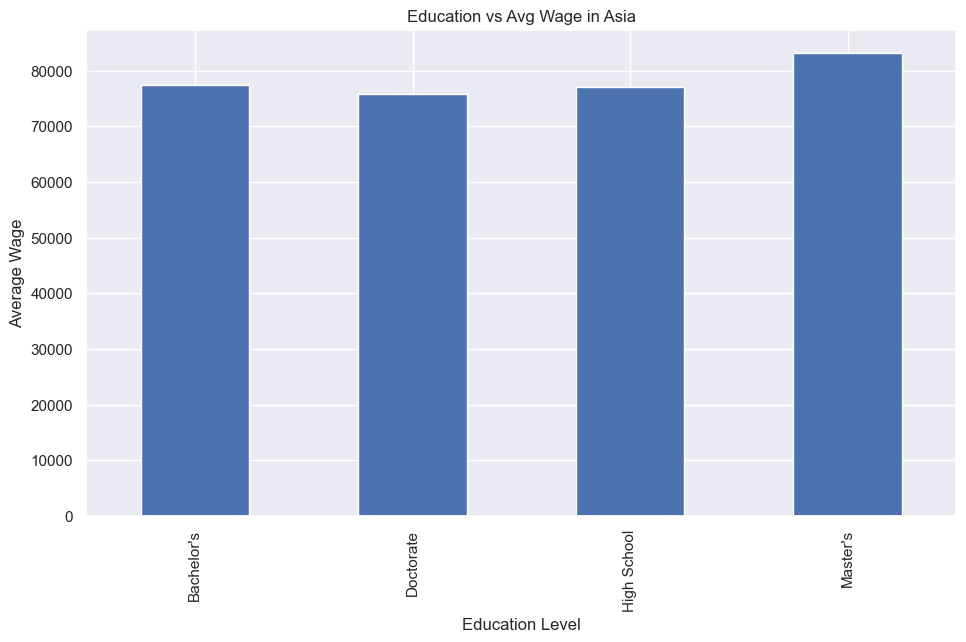

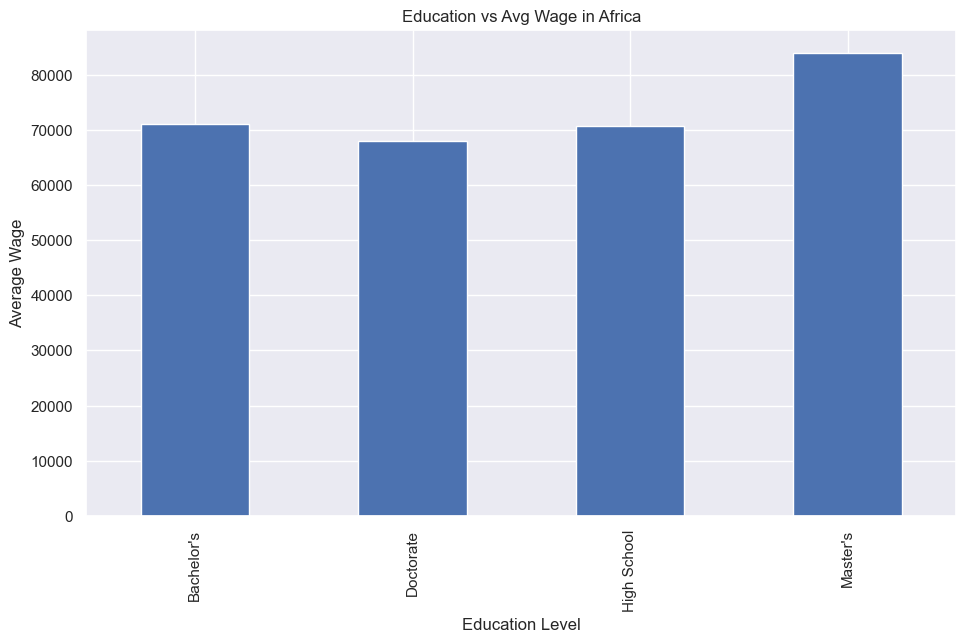

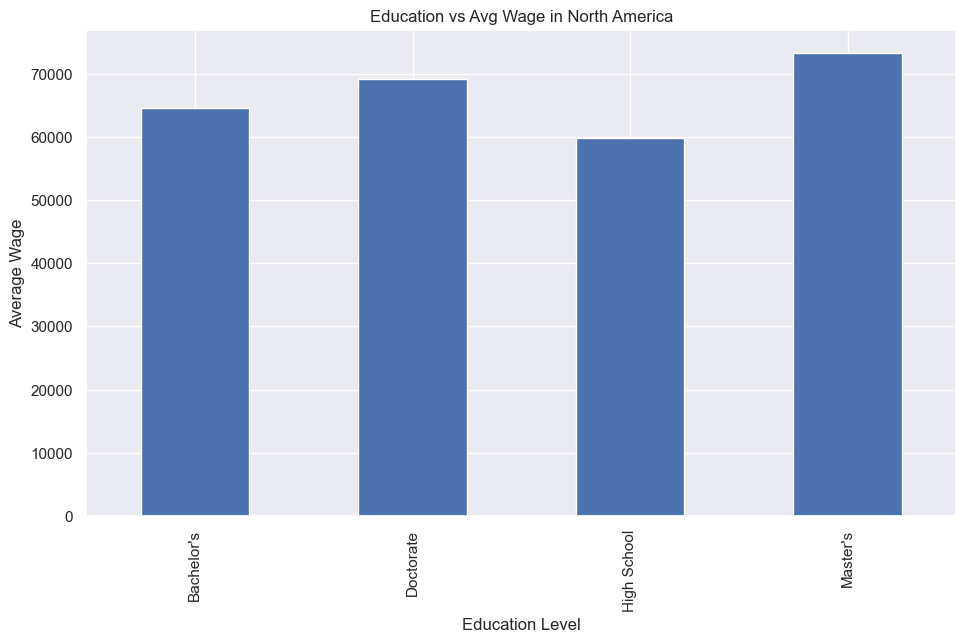

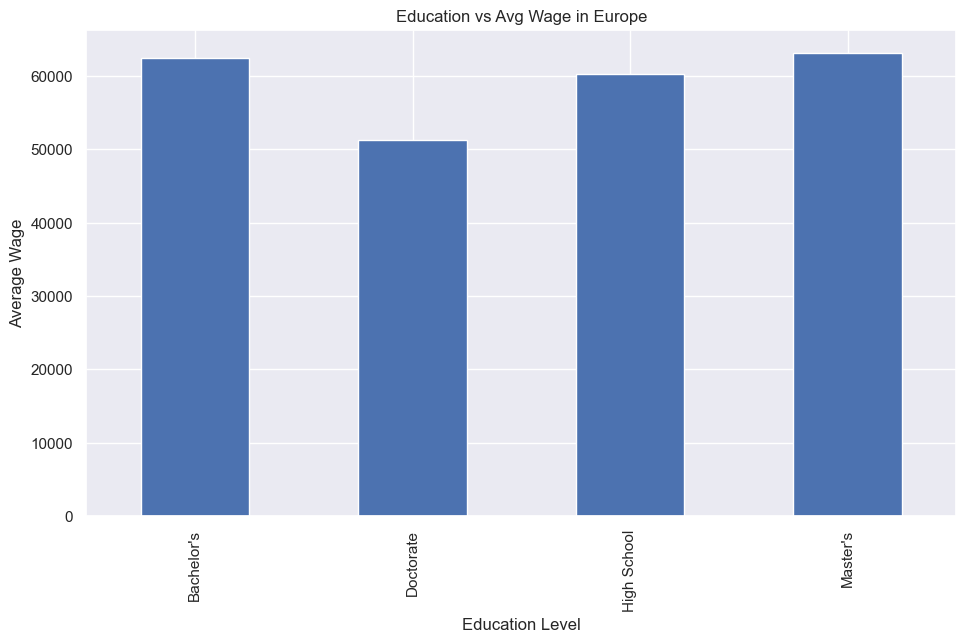

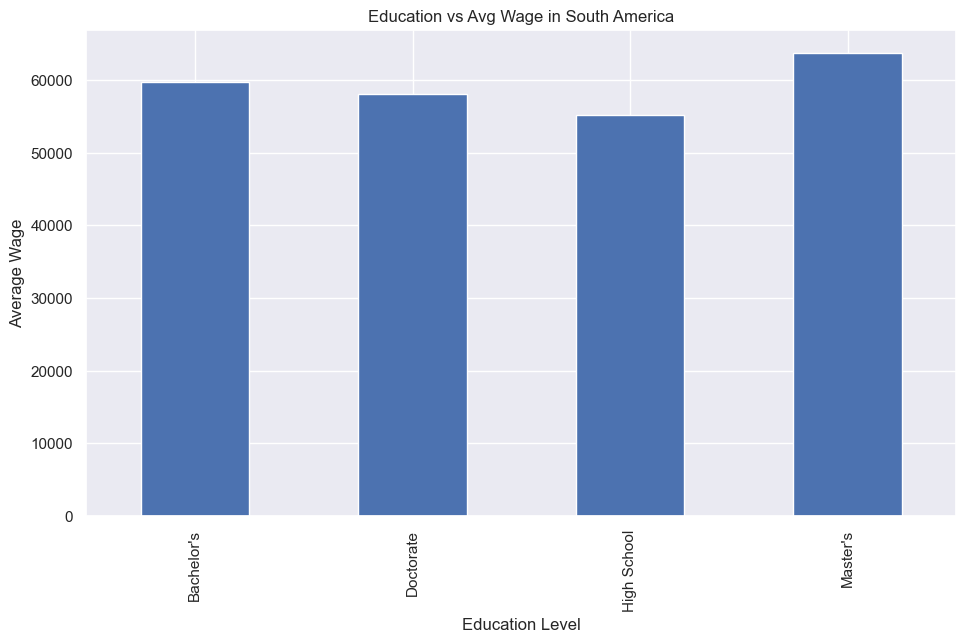

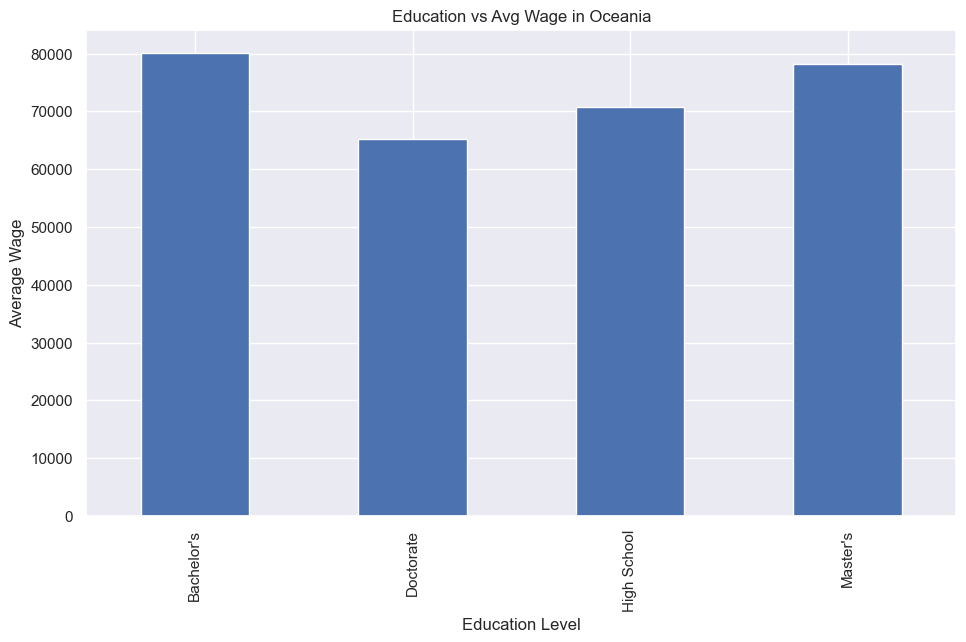

In [350]:

for continent in visa_copy['continent'].unique():
    # Filter data for the current continent and calculate the mean salary for each education level
    mean_wage = visa_copy[visa_copy['continent'] == continent].groupby(by='education_of_employee')['prevailing_wage'].mean()
    
    # Plotting the mean wage
    mean_wage.plot(kind='bar', figsize=(10, 6))
    
    # Set the plot labels and title
    plt.xlabel('Education Level')
    plt.ylabel('Average Wage')
    plt.title(f'Education vs Avg Wage in {continent}')
    
    # Display the plot
    plt.show()


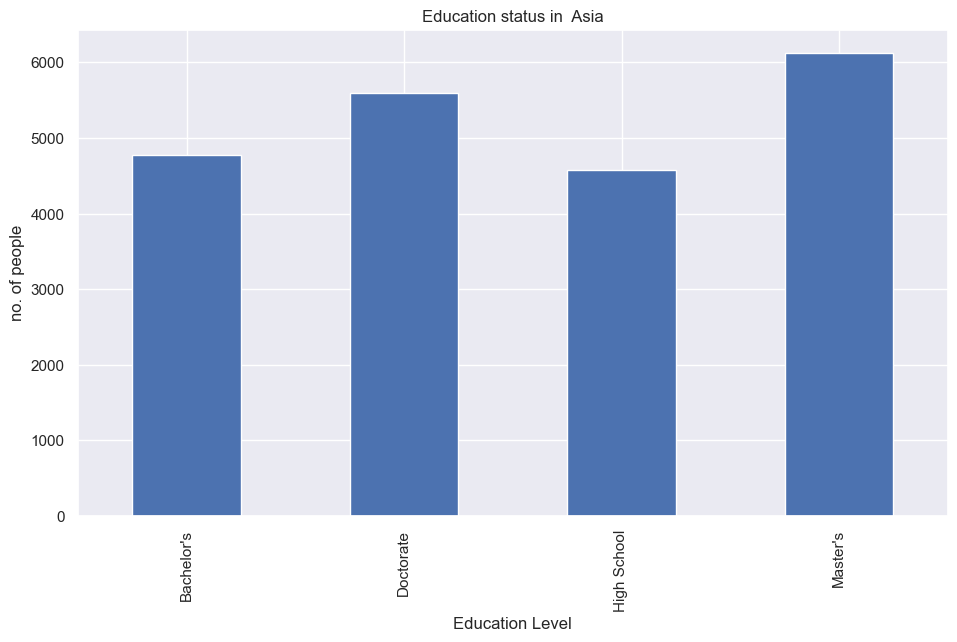

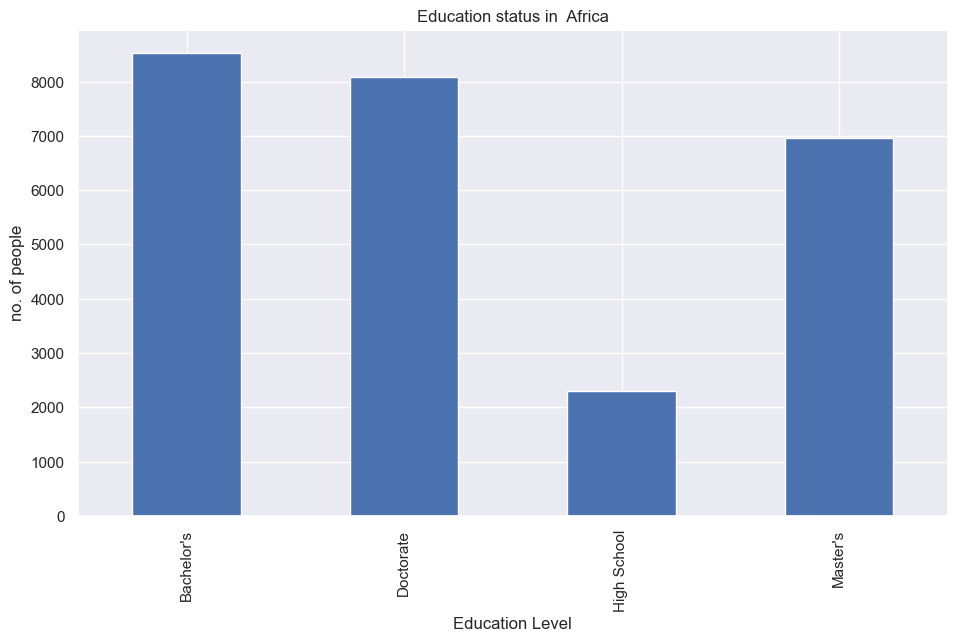

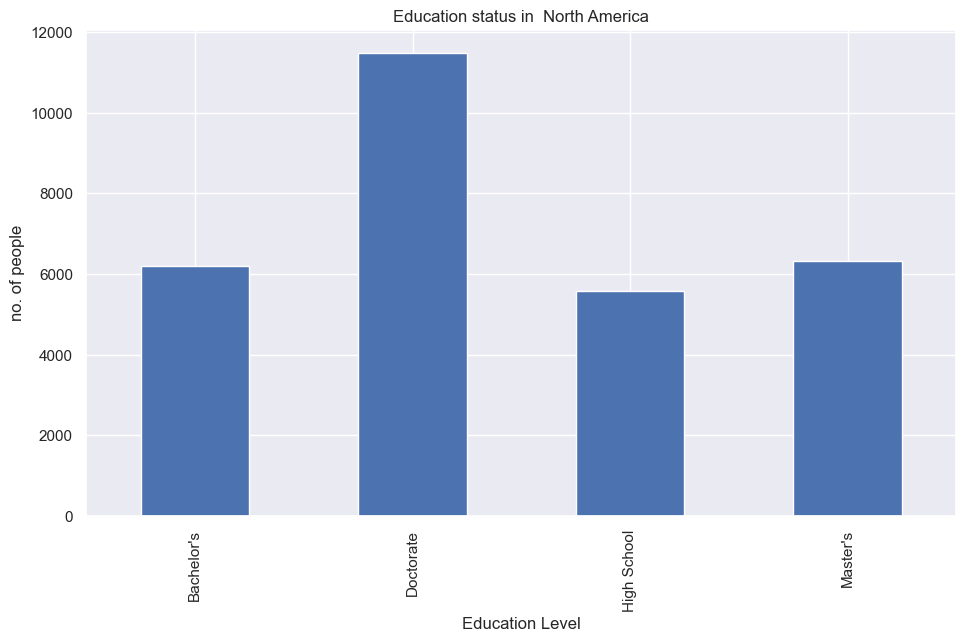

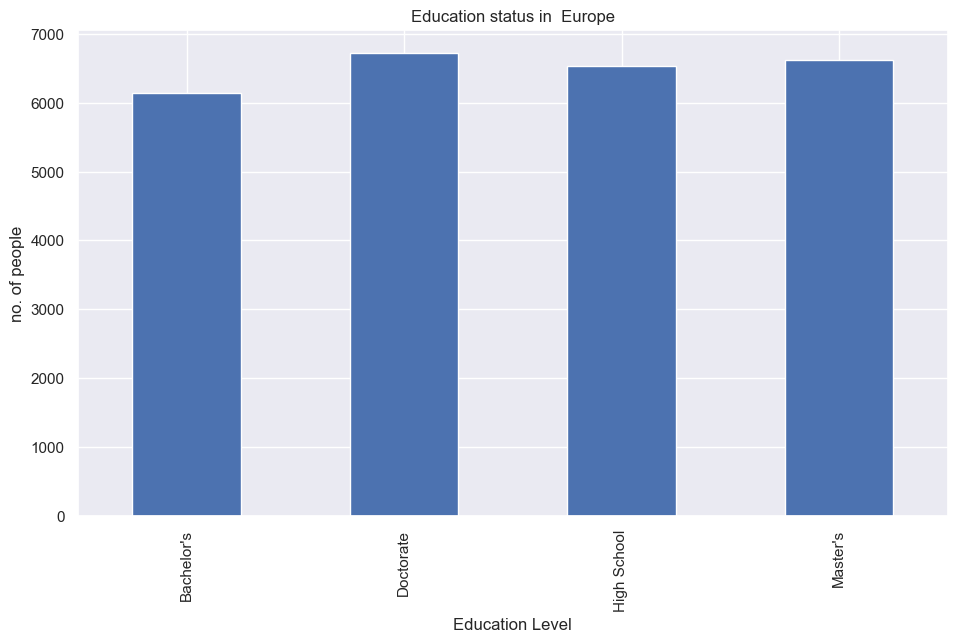

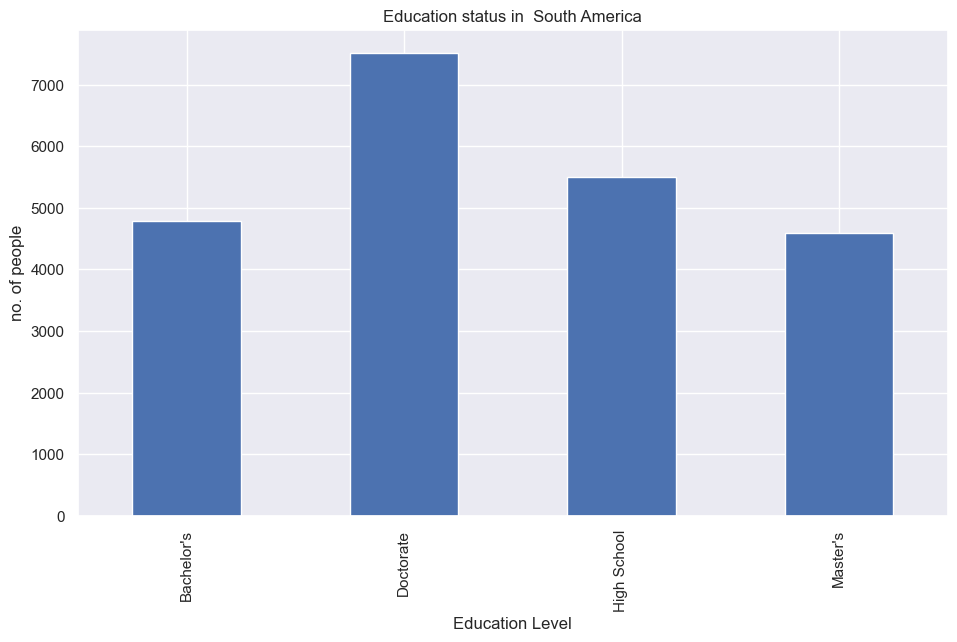

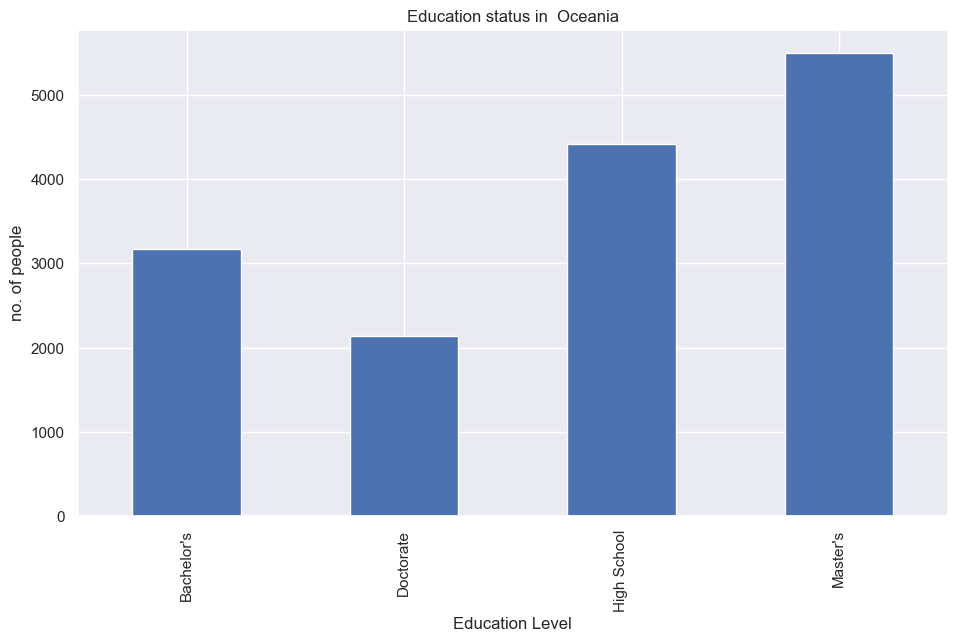

In [352]:
for continent in visa_copy['continent'].unique():
    # Filter data for the current continent and calculate the mean salary for each education level
    mean_wage = visa_copy[visa_copy['continent'] == continent].groupby(by='education_of_employee')['no_of_employees'].mean()
    
    # Plotting the mean wage
    mean_wage.plot(kind='bar', figsize=(10, 6))
    
    # Set the plot labels and title
    plt.xlabel('Education Level')
    plt.ylabel('no. of people')
    plt.title(f'Education status in  {continent}')
    
    # Display the plot
    plt.show()


In [2]:
# This command will make Python code more structured
#%load_ext nb_black

# Make warnings not displayed
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries for reading and manipulating data
import pandas as pd
import numpy as np

# Library for splitting data
from sklearn.model_selection import train_test_split

# Libaries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set limits on number of displayed columns and rows
pd.set_option("display.max_columns", None)  # no maximum limit
pd.set_option("display.max_rows", 200)  # maximum of 200 rows

# Library for building and showing decision tree models
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Library for Bagging ensemble technique
from sklearn.ensemble import BaggingClassifier

# Library for Random Forest ensemble technique
from sklearn.ensemble import RandomForestClassifier

# Library for AdaBoost ensemble technique
from sklearn.ensemble import AdaBoostClassifier

# Library for Gradient Boosting ensemble technique
from sklearn.ensemble import GradientBoostingClassifier

# Library for XGBoost ensemble technique
from xgboost import XGBClassifier

# Library for Stacking ensemble technique
from sklearn.ensemble import StackingClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

# Libraries for calculating different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    make_scorer,
    confusion_matrix,
)

In [9]:
# Read data and create a data frame
df_orig = pd.read_csv("data\\Visadataset.csv",encoding="utf-8")  # original data frame

# Create a copy of original data frame for further steps
df_0 = df_orig.copy()

In [6]:
# Print size of data frame
print(
    f"There are {df_0.shape[0]} rows and {df_0.shape[1]} columns in the original data frame."
)

There are 25480 rows and 12 columns in the original data frame.


In [8]:
# Show sample rows of original data
df_0.sample(10, random_state=1)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
17639,EZYV17640,Asia,Bachelor's,Y,N,567,1992,Midwest,26842.9100,Year,Y,Certified
23951,EZYV23952,Oceania,Bachelor's,N,N,619,1938,Midwest,66419.9800,Year,Y,Certified
8625,EZYV8626,Asia,Master's,N,N,2635,2005,South,887.2921,Hour,Y,Certified
20206,EZYV20207,Asia,Bachelor's,Y,Y,3184,1986,Northeast,49435.8000,Year,Y,Certified
7471,EZYV7472,Europe,Bachelor's,Y,N,4681,1928,West,49865.1900,Year,Y,Denied
3433,EZYV3434,Asia,Bachelor's,Y,N,222,1989,South,813.7261,Hour,Y,Certified
24440,EZYV24441,Europe,High School,N,Y,3278,1994,South,204948.3900,Year,Y,Denied
12104,EZYV12105,Asia,Master's,Y,N,1359,1997,West,202237.0400,Year,N,Certified
15656,EZYV15657,Asia,Bachelor's,N,N,2081,2003,West,111713.0200,Year,Y,Denied
23110,EZYV23111,North America,Bachelor's,Y,N,854,1998,Northeast,444.8257,Hour,Y,Denied


In [10]:
# Check for duplicate rows
dplct_no = df_0.duplicated().sum()
print(f"There are {dplct_no} duplicate rows in the data.")

There are 0 duplicate rows in the data.


In [12]:
# Check types of data columns and number of non-null values in each column
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [14]:
# Check statistical summary of numeric data
df_0.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [16]:
# Check statistical summary of non-numeric data
df_0.describe(include=["object"]).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [18]:
# Identify unique values of categorical data columns
cat_cols = df_0.select_dtypes(include="object").columns  # columns of object data type

for col in cat_cols:
    print("Unique values in the column", col, "are:")
    print(df_0[col].value_counts())
    print("=" * 60)

Unique values in the column case_id are:
case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
Unique values in the column continent are:
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
Unique values in the column education_of_employee are:
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
Unique values in the column has_job_experience are:
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
Unique values in the column requires_job_training are:
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
Unique values in the column region_of_employment are:
region_of_employment
Northeast    7195
Sout

In [20]:
# Drop case_id column before EDA, as it has no meaning for analyses and modeling
df_0.drop("case_id", axis=1, inplace=True)

In [22]:
# User-defined function to plot a boxplot and a histogram along the same scale
def histogram_boxplot(
    data, feature, xlabel, ylabel, figsize=(8, 6), kde=False, bins=None
):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    xlabel: label of x-axis
    ylabel: label of y-axis
    figsize: size of figure (default (8, 6))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column

    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="Set2"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="-"
    )  # Add median to the histogram

    ax_box2.set_xlabel("", fontsize=16)  # remove label of 1st x-axis
    ax_hist2.set_xlabel(xlabel, fontsize=16)  # set 2nd x-axis label
    ax_hist2.set_ylabel(ylabel, fontsize=16)
    # set y-axis label

In [24]:
# User-defined function to create labeled barplots
def labeled_barplot(data, feature, xlabel, ylabel, perc=False, n=None):
    """
    Barplot with percentage to the left

    data: dataframe
    feature: dataframe column
    xlabel: label of x-axis
    ylabel: label of y-axis
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(8, 0.5 * count + 1))
    else:
        plt.figure(figsize=(8, 0.5 * n + 1))

    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

    ax = sns.countplot(
        data=data,
        y=feature,
        palette="Set2",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_width() / total
            )  # percentage of each class of the category
        else:
            label = p.get_width()  # count of each level of the category

        y = p.get_y() + p.get_height() / 2
        x = p.get_width()

        ax.annotate(
            label,
            (x, y),
            ha="left",
            va="center",
            size=12,
            xytext=(0, 0),
            textcoords="offset points",
        )  # annotate the percentage

    ax.set_xlabel(xlabel, fontsize=16)  # set x-axis label
    ax.set_ylabel(ylabel, fontsize=16)  # set y-axis label

    plt.show()  # show the plot

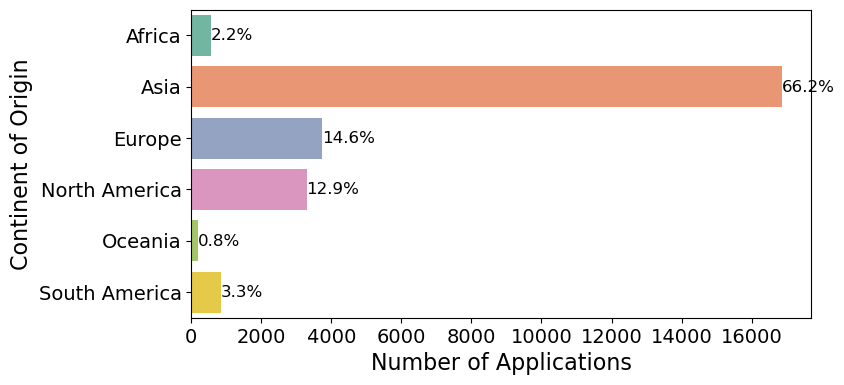

In [26]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df_0,
    feature="continent",
    xlabel="Number of Applications",
    ylabel="Continent of Origin",
    perc=True,
)

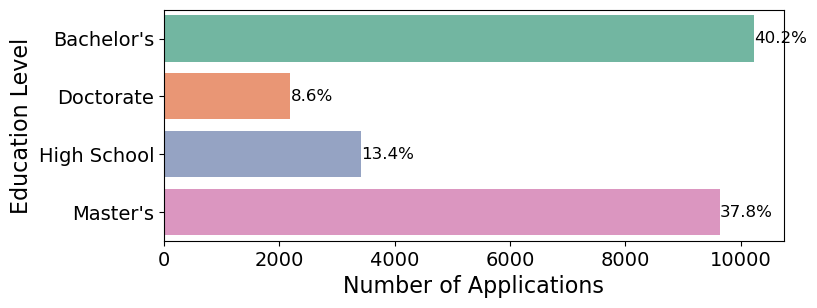

In [28]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df_0,
    feature="education_of_employee",
    xlabel="Number of Applications",
    ylabel="Education Level",
    perc=True,
)

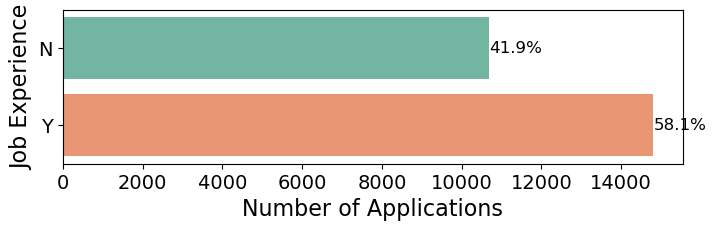

In [30]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df_0,
    feature="has_job_experience",
    xlabel="Number of Applications",
    ylabel="Job Experience",
    perc=True,
)

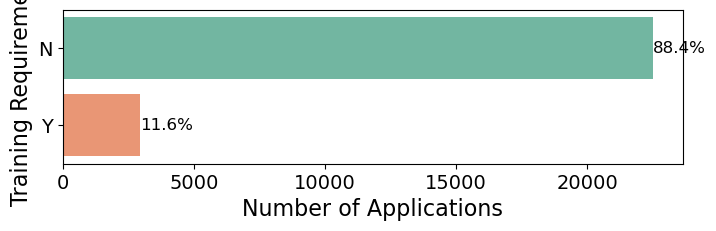

In [32]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df_0,
    feature="requires_job_training",
    xlabel="Number of Applications",
    ylabel="Training Requirement",
    perc=True,
)

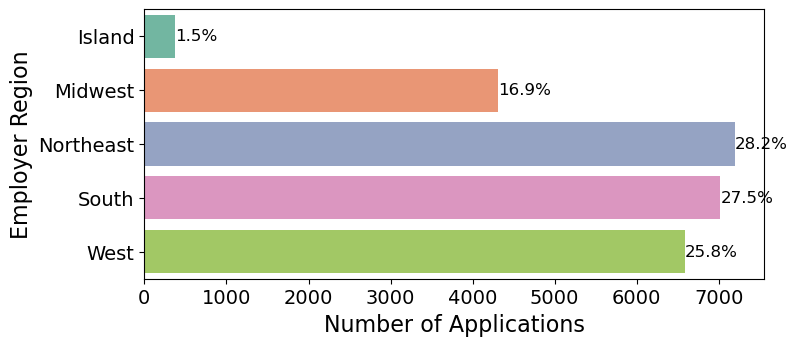

In [34]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df_0,
    feature="region_of_employment",
    xlabel="Number of Applications",
    ylabel="Employer Region",
    perc=True,
)

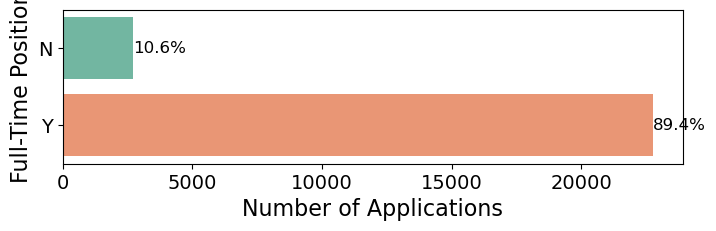

In [36]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df_0,
    feature="full_time_position",
    xlabel="Number of Applications",
    ylabel="Full-Time Position",
    perc=True,
)

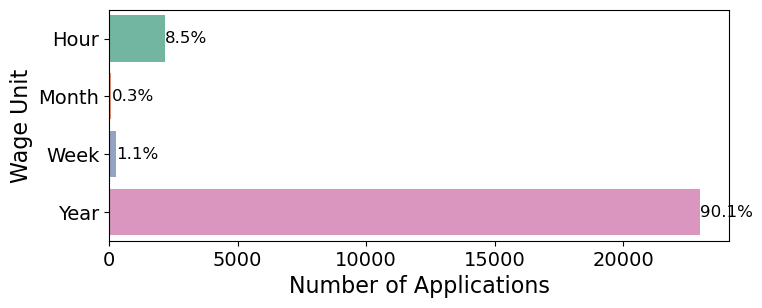

In [38]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df_0,
    feature="unit_of_wage",
    xlabel="Number of Applications",
    ylabel="Wage Unit",
    perc=True,
)

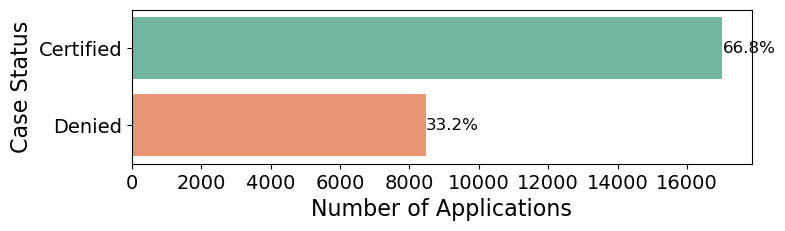

In [40]:
# Use user-defined function labeled_barplot() to examine distribution of data
labeled_barplot(
    data=df_0,
    feature="case_status",
    xlabel="Number of Applications",
    ylabel="Case Status",
    perc=True,
)

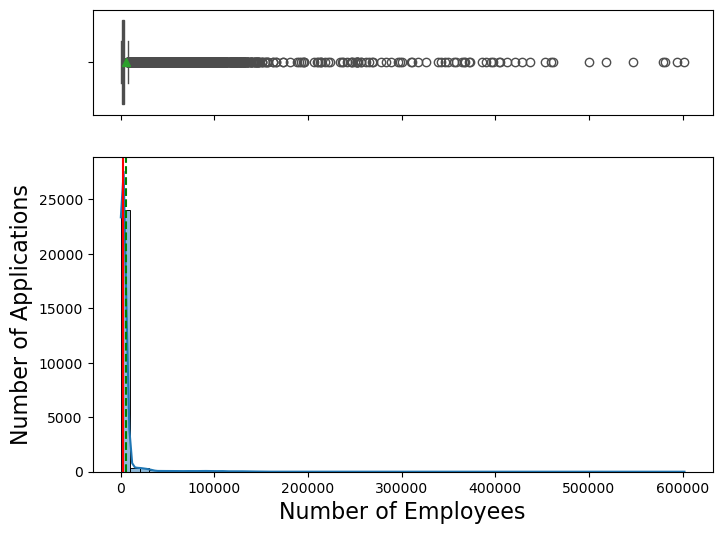

In [42]:
# Use user-defined function histogram_boxplot() to examine distribution of data
histogram_boxplot(
    data=df_0,
    feature="no_of_employees",
    xlabel="Number of Employees",
    ylabel="Number of Applications",
    kde=True,
    bins=60,
)

In [43]:
# User-defined function to plot a stacked barplot
def stacked_barplot(data, predictor, target, xlabel, ylabel):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    xlabel: label of x-axis
    ylabel: label of y-axis
    """

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 2, 4))

    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=16)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.show()

In [46]:
# User-defined function to plot distributions w.r.t. target
def distribution_plot_wrt_target(data, predictor, target, plabel, tlabel):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    plabel: label of predictor axes
    tlabel: label of target axes
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )
    axs[0, 0].set_title("Distribution of predictor for target = " + str(target_uniq[0]))
    axs[0, 0].set_xlabel(plabel, fontsize=16)
    axs[0, 0].set_ylabel("Density", fontsize=16)

    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )
    axs[0, 1].set_title("Distribution of predictor for target = " + str(target_uniq[1]))
    axs[0, 1].set_xlabel(plabel, fontsize=16)
    axs[0, 1].set_ylabel("Density", fontsize=16)

    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    axs[1, 0].set_title("Boxplot w.r.t target")
    axs[1, 0].set_xlabel(tlabel, fontsize=16)
    axs[1, 0].set_ylabel(plabel, fontsize=16)

    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    axs[1, 1].set_xlabel(tlabel, fontsize=16)
    axs[1, 1].set_ylabel(plabel, fontsize=16)

    plt.tight_layout()
    plt.show()

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


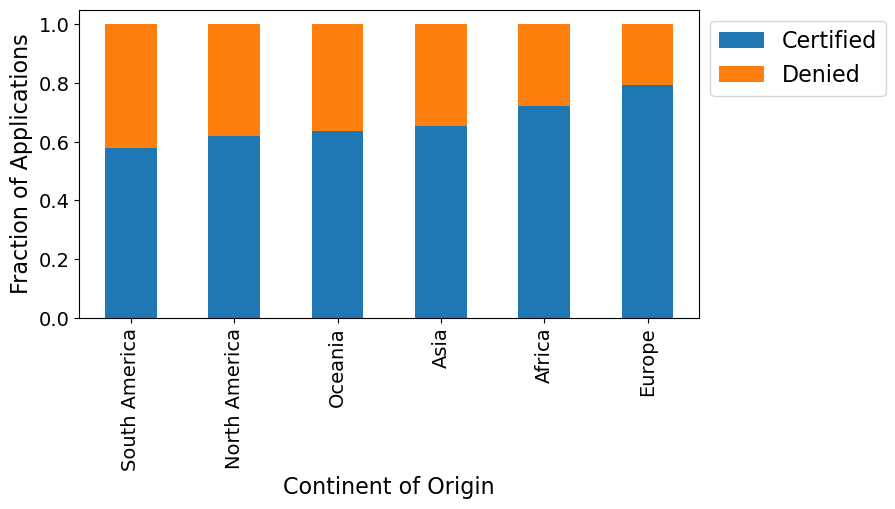

In [48]:
# Use user-defined function stacked_barplot() to examine case certification likelihoods vs continent of origin
stacked_barplot(
    data=df_0,
    predictor="continent",
    target="case_status",
    xlabel="Continent of Origin",
    ylabel="Fraction of Applications",
)

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


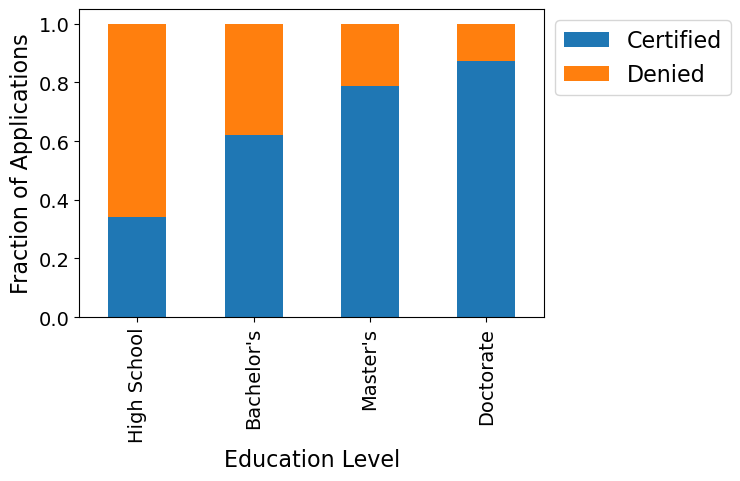

In [50]:
# Use user-defined function stacked_barplot() to examine case certification likelihoods vs education level
stacked_barplot(
    data=df_0,
    predictor="education_of_employee",
    target="case_status",
    xlabel="Education Level",
    ylabel="Fraction of Applications",
)

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


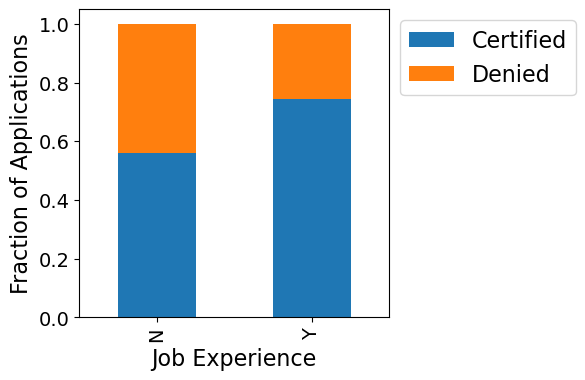

In [52]:
# Use user-defined function stacked_barplot() to examine case certification likelihoods vs job experience
stacked_barplot(
    data=df_0,
    predictor="has_job_experience",
    target="case_status",
    xlabel="Job Experience",
    ylabel="Fraction of Applications",
)

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


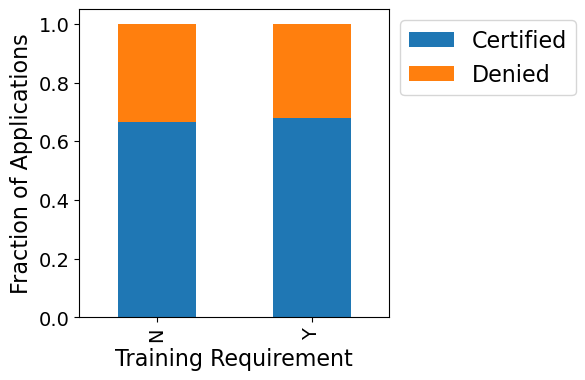

In [54]:
# Use user-defined function stacked_barplot() to examine case certification likelihoods vs training requirement
stacked_barplot(
    data=df_0,
    predictor="requires_job_training",
    target="case_status",
    xlabel="Training Requirement",
    ylabel="Fraction of Applications",
)

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


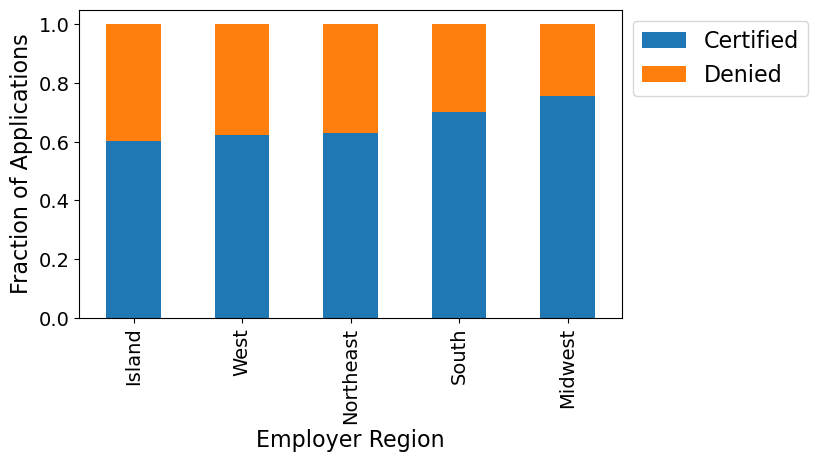

In [56]:
# Use user-defined function stacked_barplot() to examine case certification likelihoods vs employer region
stacked_barplot(
    data=df_0,
    predictor="region_of_employment",
    target="case_status",
    xlabel="Employer Region",
    ylabel="Fraction of Applications",
)

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


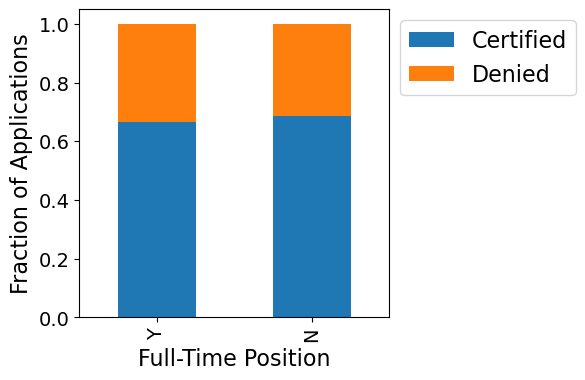

In [58]:
# Use user-defined function stacked_barplot() to examine case certification likelihoods vs position type
stacked_barplot(
    data=df_0,
    predictor="full_time_position",
    target="case_status",
    xlabel="Full-Time Position",
    ylabel="Fraction of Applications",
)

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


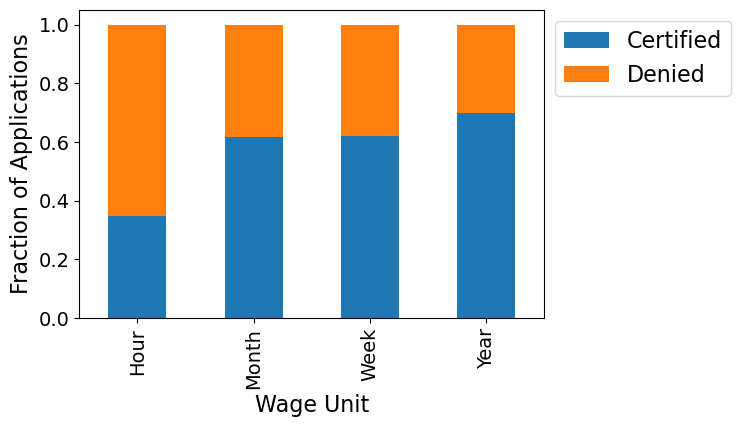

In [60]:
# Use user-defined function stacked_barplot() to examine case certification likelihoods vs unit of prevailing wage
stacked_barplot(
    data=df_0,
    predictor="unit_of_wage",
    target="case_status",
    xlabel="Wage Unit",
    ylabel="Fraction of Applications",
)

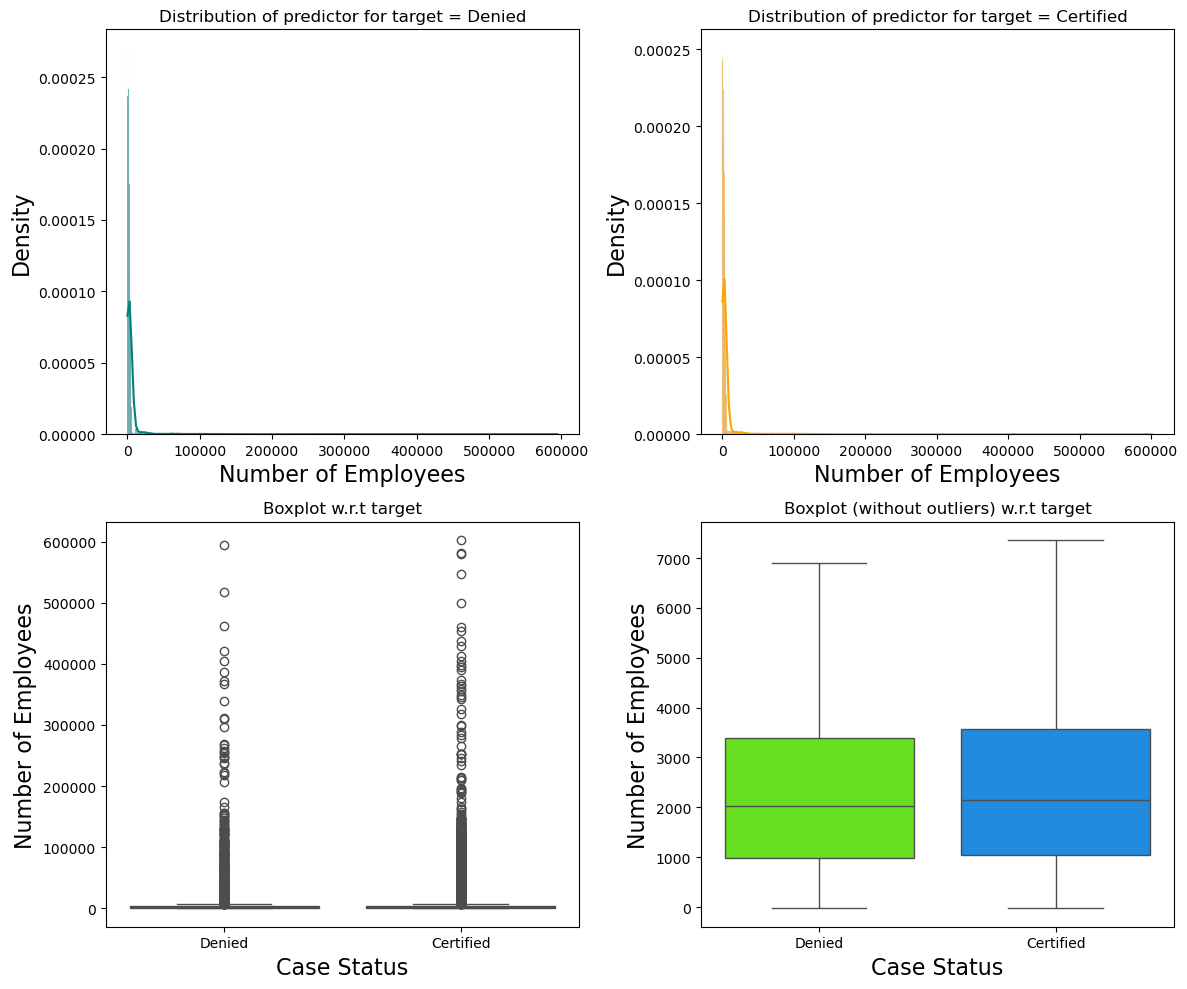

In [62]:
# Use user-defined function distribution_plot_wrt_target() to examine case certification likelihoods across data categories
distribution_plot_wrt_target(
    data=df_0,
    predictor="no_of_employees",
    target="case_status",
    plabel="Number of Employees",
    tlabel="Case Status",
)

Text(0.5, 14.722222222222216, 'Training Requirement')

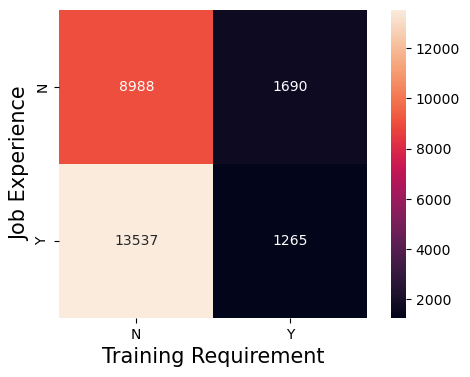

In [63]:
# Use seaborn heatmap to compare number of applications pivoted on job experience and training requirement

# Create a count pivot table with respect to columns has_job_experience and requires_job_training
pt = df_0.pivot_table(
    values="case_status",
    index="has_job_experience",
    columns="requires_job_training",
    aggfunc="count",
)

# Plot a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pt, square=True, annot=True, fmt="g")
plt.ylabel("Job Experience", fontsize=15)
plt.xlabel("Training Requirement", fontsize=15)

requires_job_training      N     Y    All
continent                                
All                    22525  2955  25480
Asia                   15113  1748  16861
Europe                  2993   739   3732
North America           3044   248   3292
South America            702   150    852
Africa                   510    41    551
Oceania                  163    29    192
------------------------------------------------------------------------------------------------------------------------


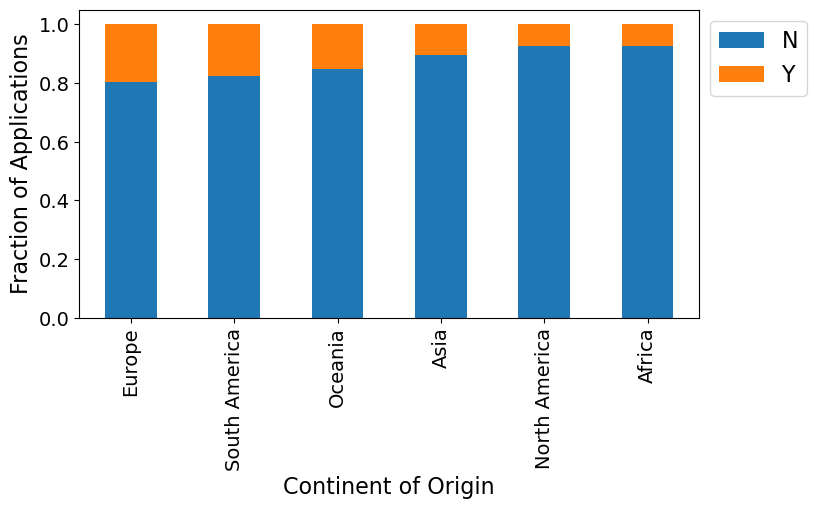

In [64]:
# Use user-defined function stacked_barplot() to examine job training requirement vs continent of origin of applicants
stacked_barplot(
    data=df_0,
    predictor="continent",
    target="requires_job_training",
    xlabel="Continent of Origin",
    ylabel="Fraction of Applications",
)

In [65]:
# Create a copy of data frame before preprocessing
df_1 = df_0.copy()

In [66]:
# Identify rows with non-positive no_of_employees
neg_employee_no_rows = df_1.no_of_employees <= 0

# Print number of rows with non-positive no_of_employees
print(
    f"There are {neg_employee_no_rows.sum()} rows with non-positive number of employees."
)

# Replace negative values in column no_of_employees with its median
df_1.loc[neg_employee_no_rows, "no_of_employees"] = df_1.no_of_employees.median()

# Double-check minimum value of no_of_employees
print(f"The new minimum number of employees is {df_1.no_of_employees.min()}.")

There are 33 rows with non-positive number of employees.
The new minimum number of employees is 12.


In [67]:
# Add a new column, yrs_snc_estab, including years since establishment - final year is 2016, when data is gathered
df_1["yrs_snc_estab"] = 2016 - df_1.yr_of_estab

# Drom yr_of_estab
df_1.drop("yr_of_estab", axis=1, inplace=True)

# Create a column including equivalent hourly wages - it is assumed that:
# A year includes 2080 work-hours
# A month includes 173 work-hours
# A week includes 40 work-hours
df_1["hourly_wage"] = df_1["prevailing_wage"]
df_1.loc[df_1.unit_of_wage == "Year", "hourly_wage"] = (
    df_1.loc[df_1.unit_of_wage == "Year", "hourly_wage"] / 2080.0
)
df_1.loc[df_1.unit_of_wage == "Month", "hourly_wage"] = (
    df_1.loc[df_1.unit_of_wage == "Month", "hourly_wage"] / 173.0
)
df_1.loc[df_1.unit_of_wage == "Week", "hourly_wage"] = (
    df_1.loc[df_1.unit_of_wage == "Week", "hourly_wage"] / 40.0
)

# Drom yr_of_estab
df_1.drop("prevailing_wage", axis=1, inplace=True)

# Check sample rows of updated data
df_1.sample(10, random_state=1)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,unit_of_wage,full_time_position,case_status,yrs_snc_estab,hourly_wage
17639,Asia,Bachelor's,Y,N,567,Midwest,Year,Y,Certified,24,12.905245
23951,Oceania,Bachelor's,N,N,619,Midwest,Year,Y,Certified,78,31.932683
8625,Asia,Master's,N,N,2635,South,Hour,Y,Certified,11,887.292100
20206,Asia,Bachelor's,Y,Y,3184,Northeast,Year,Y,Certified,30,23.767212
7471,Europe,Bachelor's,Y,N,4681,West,Year,Y,Denied,88,23.973649
3433,Asia,Bachelor's,Y,N,222,South,Hour,Y,Certified,27,813.726100
24440,Europe,High School,N,Y,3278,South,Year,Y,Denied,22,98.532880
12104,Asia,Master's,Y,N,1359,West,Year,N,Certified,19,97.229346
15656,Asia,Bachelor's,N,N,2081,West,Year,Y,Denied,13,53.708183
23110,North America,Bachelor's,Y,N,854,Northeast,Hour,Y,Denied,18,444.825700


In [74]:
# Check statistical summary of numeric data in updated data
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5669.797645,22877.372247,12.000000,1028.00000,2109.000000,3504.000000,602069.00000
yrs_snc_estab,25480.0,36.590071,42.366929,0.000000,11.00000,19.000000,40.000000,216.00000
hourly_wage,25480.0,94.902995,278.176919,0.048077,22.64806,39.826663,60.012036,7004.39875


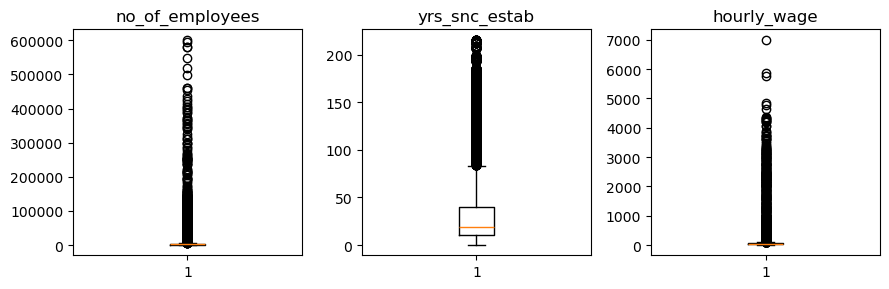

In [76]:
# Create a list of column names including numeric data
num_cols = df_1.select_dtypes(include=np.number).columns.tolist()

# Use boxplots with 1.5*IQR whiskers for each numeric variable to detect potential outliers
plt.figure(figsize=(9, 3))

for i, variable in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(df_1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

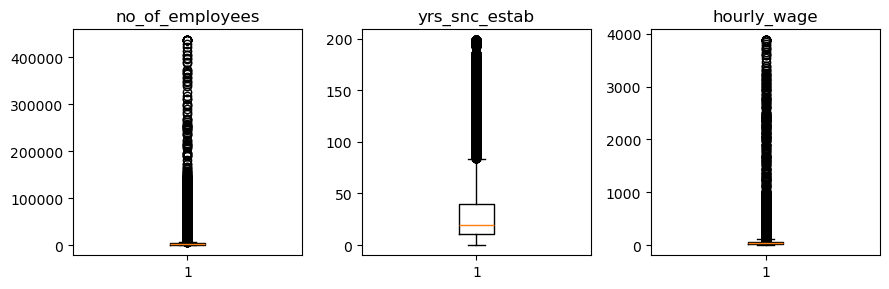

In [78]:
# Replace outliers in no_of_employees
df_1.loc[df_1.no_of_employees > 450000, "no_of_employees"] = df_1[
    df_1.no_of_employees <= 450000
].no_of_employees.max()

# Replace outliers in yrs_snc_estab
df_1.loc[df_1.yrs_snc_estab > 200, "yrs_snc_estab"] = df_1[
    df_1.yrs_snc_estab <= 200
].yrs_snc_estab.max()

# Replace outliers in hourly_wage
df_1.loc[df_1.hourly_wage > 4000, "hourly_wage"] = df_1[
    df_1.hourly_wage <= 4000
].hourly_wage.max()

# Use boxplots to check distributions again
plt.figure(figsize=(9, 3))

for i, variable in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(df_1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

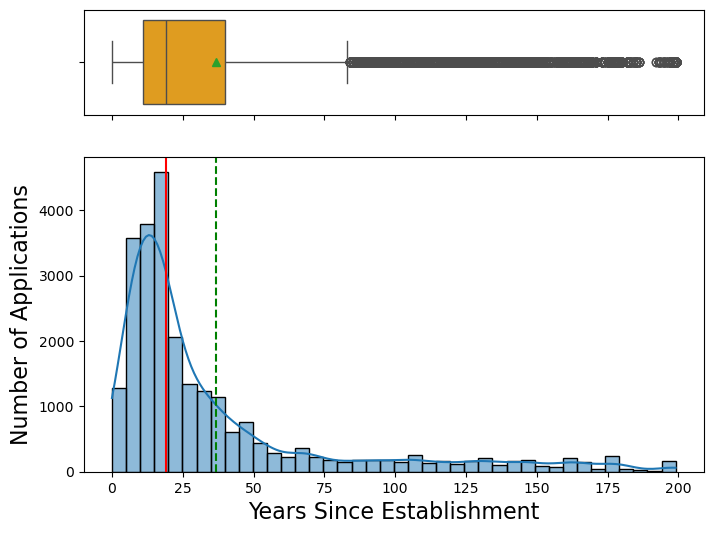

In [80]:
# Use user-defined function histogram_boxplot() to examine distribution of data
histogram_boxplot(
    data=df_1,
    feature="yrs_snc_estab",
    xlabel="Years Since Establishment",
    ylabel="Number of Applications",
    kde=True,
    bins=40,
)

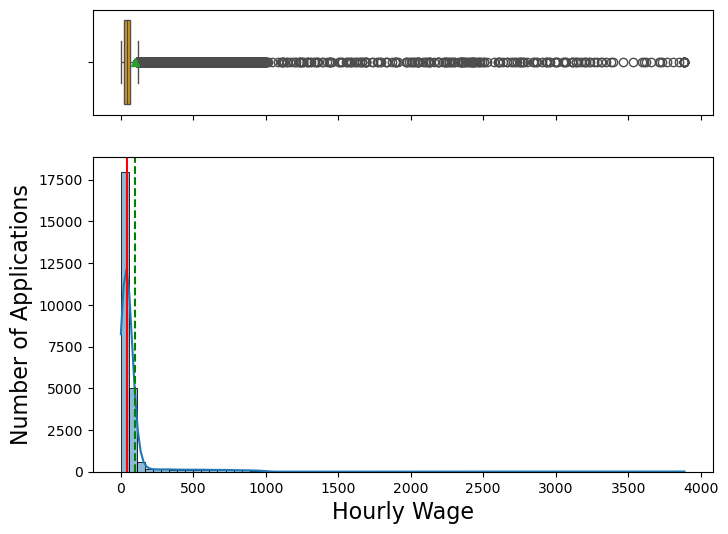

In [82]:
# Use user-defined function histogram_boxplot() to examine distribution of data
histogram_boxplot(
    data=df_1,
    feature="hourly_wage",
    xlabel="Hourly Wage",
    ylabel="Number of Applications",
    kde=True,
    bins=70,
)

Text(0.5, 1.0, 'Correlation Coefficients')

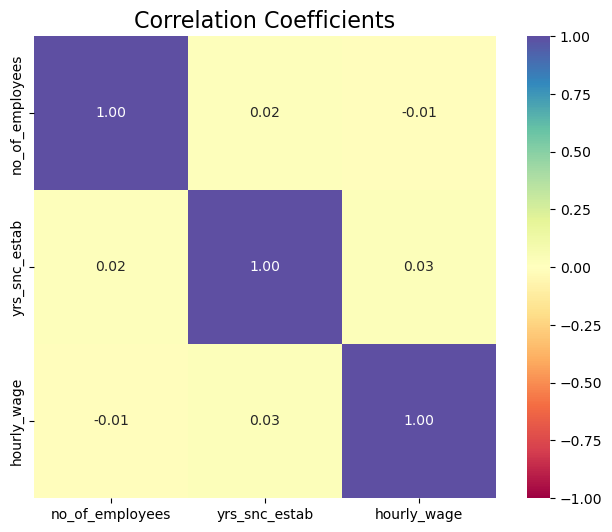

In [84]:
# Create a list of column names including numeric data
num_cols = df_1.select_dtypes(include=np.number).columns.tolist()

# Compute correlation coefficients
rhos = df_1[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))  # set figure size

p = sns.heatmap(
    rhos,
    annot=True,
    square=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)  # create heatmap

p.set_title("Correlation Coefficients", fontsize=16)
# set chart's title

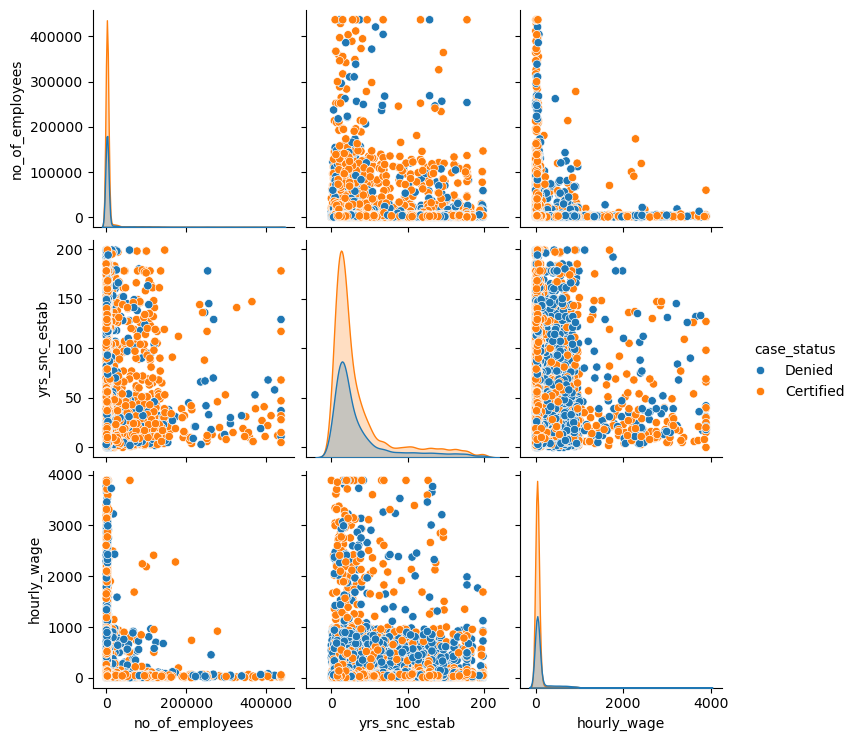

In [86]:
# Add case_status to list of column names including numeric data
num_cols = num_cols + ["case_status"]

# Create a pairplot to see distributions of and relationships between variations of numeric data
sns.pairplot(data=df_1[num_cols], hue="case_status", diag_kind="kde", aspect=1)

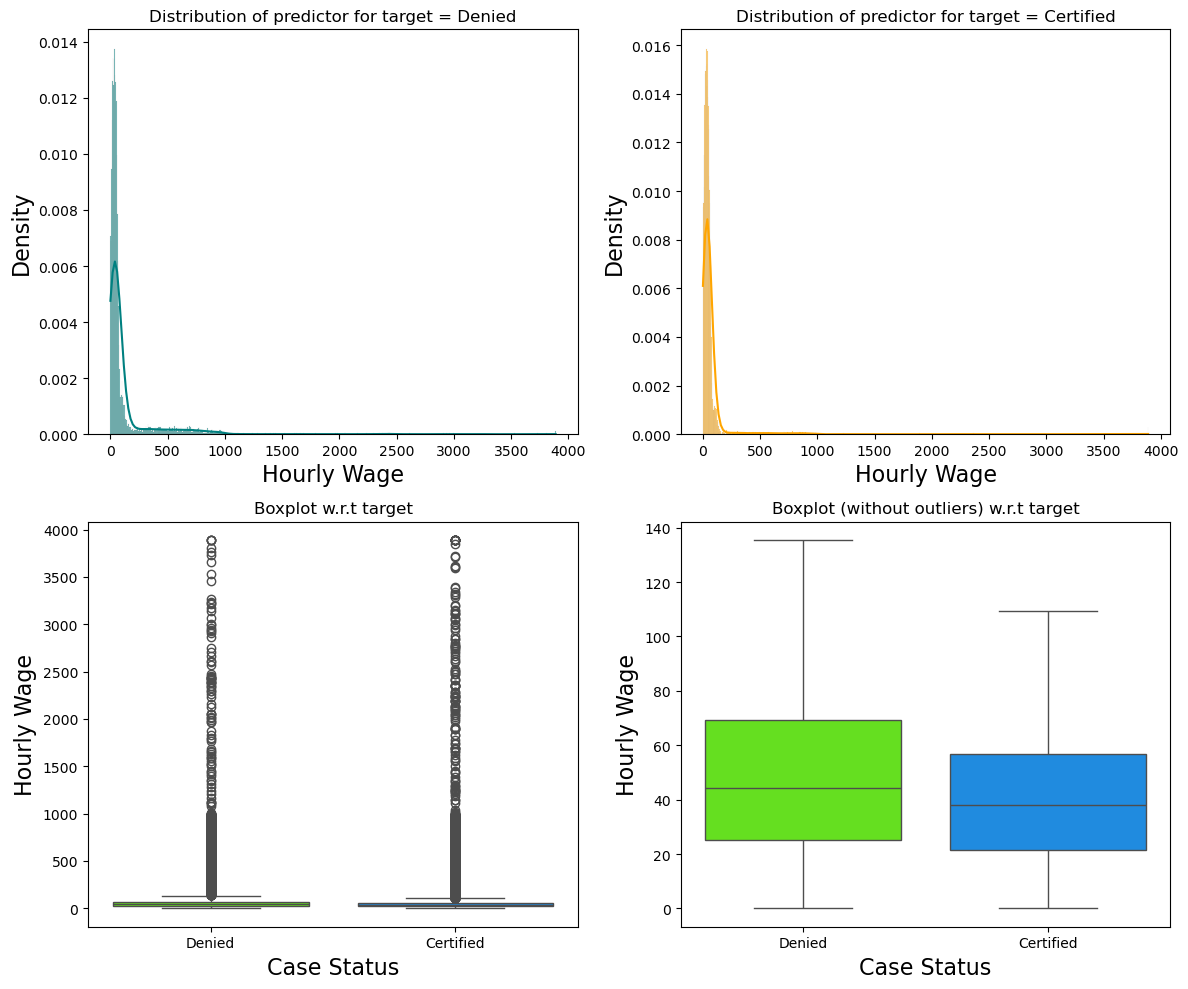

In [87]:
# Use user-defined function distribution_plot_wrt_target() to examine case certification likelihoods across data categories
distribution_plot_wrt_target(
    data=df_1,
    predictor="hourly_wage",
    target="case_status",
    plabel="Hourly Wage",
    tlabel="Case Status",
)

([0, 1, 2, 3],
 [Text(0, 0, 'High School'),
  Text(0, 1, "Master's"),
  Text(0, 2, "Bachelor's"),
  Text(0, 3, 'Doctorate')])

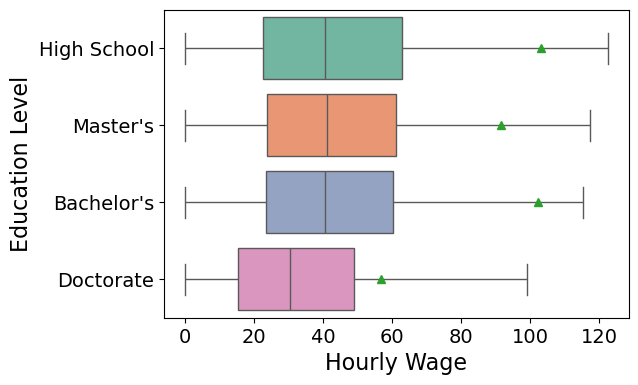

In [88]:
# Use seaborn boxplot to compare distributions of hourly wage for different education levels without outliers
plt.figure(figsize=(6, 4))
# set figure size
sns.boxplot(
    data=df_1,
    y="education_of_employee",
    x="hourly_wage",
    showmeans=True,
    showfliers=False,
    palette="Set2",
)  # create box plot

# set axis labels
plt.xlabel("Hourly Wage", fontsize=16)
plt.ylabel("Education Level", fontsize=16)

# set font size for axis ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

([0, 1], [Text(0, 0, 'N'), Text(0, 1, 'Y')])

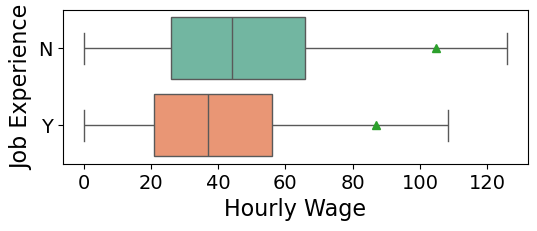

In [89]:
# Use seaborn boxplot to compare distributions of hourly wage with respect to job experience
plt.figure(figsize=(6, 2))
# set figure size
sns.boxplot(
    data=df_1,
    y="has_job_experience",
    x="hourly_wage",
    showmeans=True,
    showfliers=False,
    palette="Set2",
)  # create box plot

# set axis labels
plt.xlabel("Hourly Wage", fontsize=16)
plt.ylabel("Job Experience", fontsize=16)

# set font size for axis ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

([0, 1], [Text(0, 0, 'N'), Text(0, 1, 'Y')])

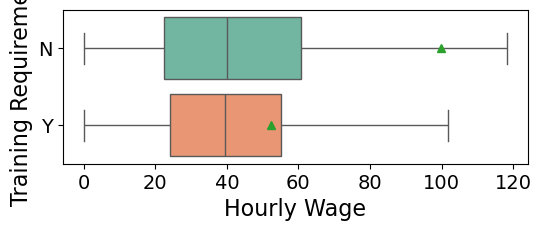

In [90]:
# Use seaborn boxplot to compare distributions of hourly wage with respect to job training requirement
plt.figure(figsize=(6, 2))
# set figure size
sns.boxplot(
    data=df_1,
    y="requires_job_training",
    x="hourly_wage",
    showmeans=True,
    showfliers=False,
    palette="Set2",
)  # create box plot

# set axis labels
plt.xlabel("Hourly Wage", fontsize=16)
plt.ylabel("Training Requirement", fontsize=16)

# set font size for axis ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

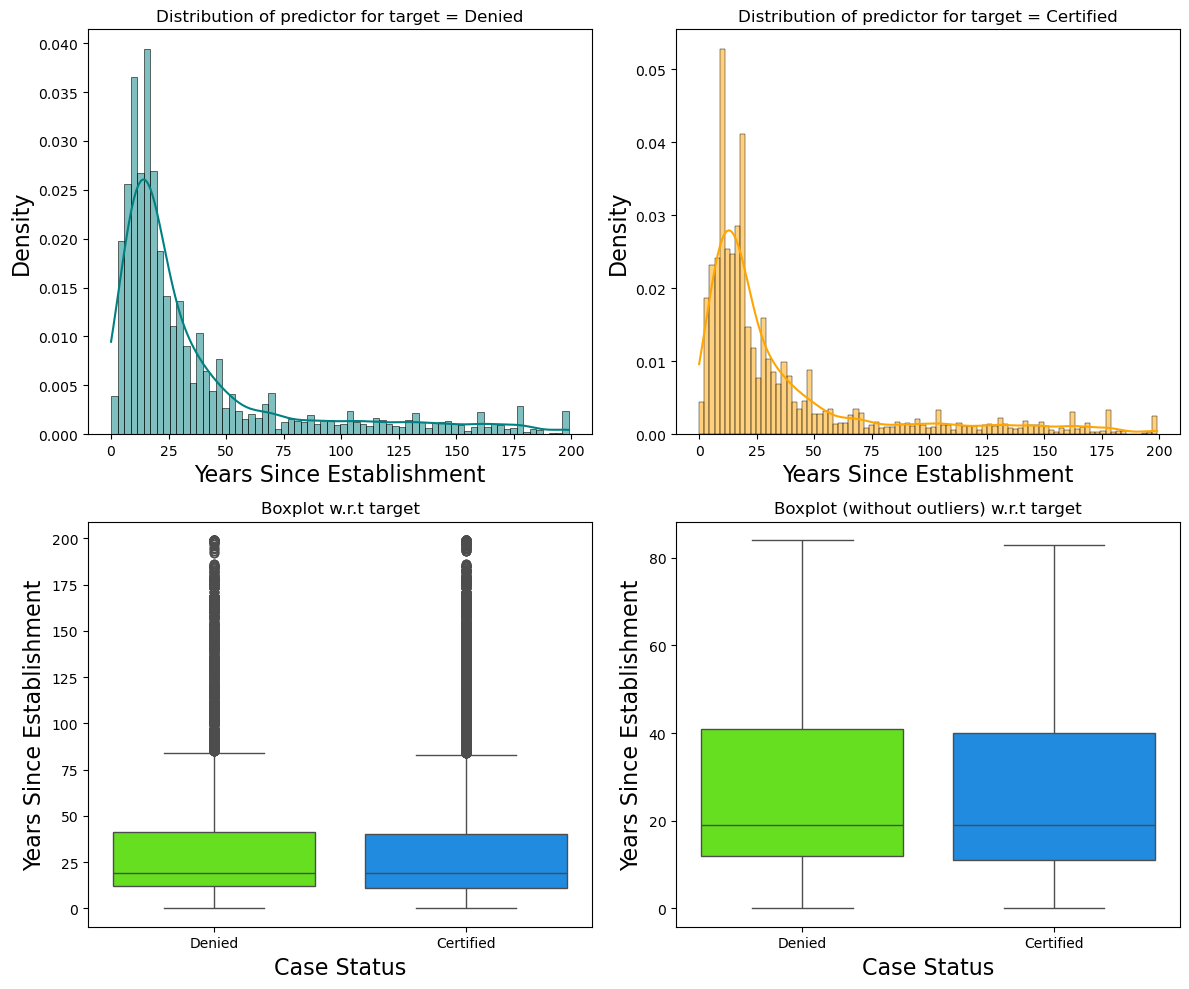

In [91]:
# Use user-defined function distribution_plot_wrt_target() to examine case certification likelihoods across data categories
distribution_plot_wrt_target(
    data=df_1,
    predictor="yrs_snc_estab",
    target="case_status",
    plabel="Years Since Establishment",
    tlabel="Case Status",
)

Text(37.597222222222214, 0.5, 'Number of Employees')

<Figure size 400x400 with 0 Axes>

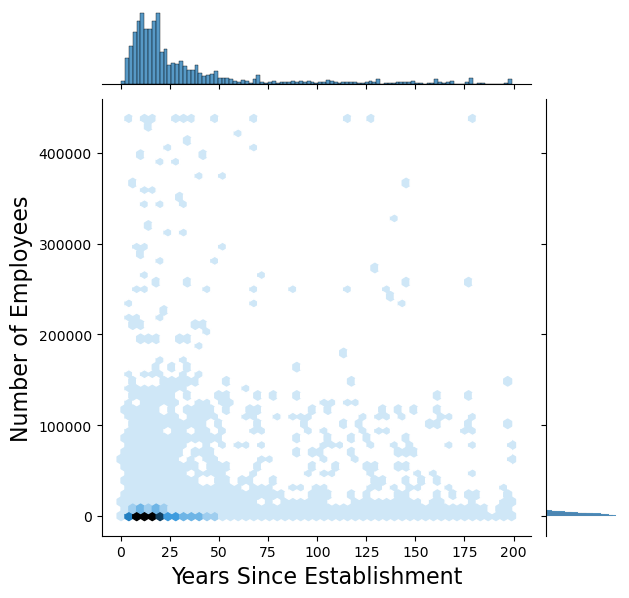

In [92]:
# Use seaborn jointplot to compare distributions of number of employees vs years since employer's establishment
plt.figure(figsize=(4, 4))
# set figure size
sns.jointplot(data=df_1, x="yrs_snc_estab", y="no_of_employees", kind="hex", bins=10)
# create joint plot

plt.xlabel("Years Since Establishment", fontsize=16)
# set x-axis label
plt.ylabel("Number of Employees", fontsize=16)
# set y-axis label

In [93]:
# has_job_experience, requires_job_training, and full_time_position:
# Replace 'Y' with 1 and 'N' with 0
df_1.has_job_experience = df_1.has_job_experience.apply(lambda x: 1 if x == "Y" else 0)
df_1.requires_job_training = df_1.requires_job_training.apply(
    lambda x: 1 if x == "Y" else 0
)
df_1.full_time_position = df_1.full_time_position.apply(lambda x: 1 if x == "Y" else 0)

# case_status:
# Replace 'Certified' with 1 and 'Denied' with 0
df_1.case_status = df_1.case_status.apply(lambda x: 1 if x == "Certified" else 0)

# education_of_employee:
# Replace 'High School' with 1, 'Bachelor's' with 2, 'Master's' with 3, and 'Doctarate' with 4
df_1.education_of_employee = df_1.education_of_employee.apply(
    lambda x: 1
    if x == "High School"
    else (2 if x == "Bachelor's" else (3 if x == "Master's" else 4))
)

# Check updated sample rows
df_1.sample(10, random_state=1)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,unit_of_wage,full_time_position,case_status,yrs_snc_estab,hourly_wage
17639,Asia,2,1,0,567,Midwest,Year,1,1,24,12.905245
23951,Oceania,2,0,0,619,Midwest,Year,1,1,78,31.932683
8625,Asia,3,0,0,2635,South,Hour,1,1,11,887.292100
20206,Asia,2,1,1,3184,Northeast,Year,1,1,30,23.767212
7471,Europe,2,1,0,4681,West,Year,1,0,88,23.973649
3433,Asia,2,1,0,222,South,Hour,1,1,27,813.726100
24440,Europe,1,0,1,3278,South,Year,1,0,22,98.532880
12104,Asia,3,1,0,1359,West,Year,0,1,19,97.229346
15656,Asia,2,0,0,2081,West,Year,1,0,13,53.708183
23110,North America,2,1,0,854,Northeast,Hour,1,0,18,444.825700


In [94]:
# Create a data frame with only independent variables
X = df_1.drop(["case_status"], axis=1)

# Create a series with only dependent variable
Y = df_1.case_status

# Print some rows of X and Y data frames to check them
print("Independent Variables\n", "=" * 80, "\n", X.sample(5, random_state=1))
print("\n\nDependent Variables\n", "=" * 80, "\n", Y.sample(5, random_state=1))

Independent Variables
       continent  education_of_employee  has_job_experience  \
17639      Asia                      2                   1   
23951   Oceania                      2                   0   
8625       Asia                      3                   0   
20206      Asia                      2                   1   
7471     Europe                      2                   1   

       requires_job_training  no_of_employees region_of_employment  \
17639                      0              567              Midwest   
23951                      0              619              Midwest   
8625                       0             2635                South   
20206                      1             3184            Northeast   
7471                       0             4681                 West   

      unit_of_wage  full_time_position  yrs_snc_estab  hourly_wage  
17639         Year                   1             24    12.905245  
23951         Year                   1       

In [95]:
# Use pandas function get_dummies to create dummy variables and drop their first one
X = pd.get_dummies(X, drop_first=True)

# Check updated independent variables data frame
X.sample(5, random_state=1)

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,full_time_position,yrs_snc_estab,hourly_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
17639,2,1,0,567,1,24,12.905245,True,False,False,False,False,True,False,False,False,False,False,True
23951,2,0,0,619,1,78,31.932683,False,False,False,True,False,True,False,False,False,False,False,True
8625,3,0,0,2635,1,11,887.292100,True,False,False,False,False,False,False,True,False,False,False,False
20206,2,1,1,3184,1,30,23.767212,True,False,False,False,False,False,True,False,False,False,False,True
7471,2,1,0,4681,1,88,23.973649,False,True,False,False,False,False,False,False,True,False,False,True


In [96]:
# Use function train_test_split to create training and testing data sets for both dependnet and independent variables
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1, stratify=Y
)

# Check number of rows in each data set
print("Number of rows in training data set =", X_train.shape[0])
print("\nNumber of rows in test data set =", X_test.shape[0])

# Show percentage of number of rows in each data set
print("\nPercentage of classes in training set:")
print(Y_train.value_counts(normalize=True))
print("\nPercentage of classes in test set:")
print(Y_test.value_counts(normalize=True))

Number of rows in training data set = 17836

Number of rows in test data set = 7644

Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64

Percentage of classes in test set:
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64


In [97]:
# User-defined function to compute different performance metrics to evaluate a classification model built using sklearn
def get_metrics_score(model, flag=True):
    """
    model: classifier to predict values of Y
    """

    # Predict Y using independent variables
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Compute performance metrics
    train_acc = accuracy_score(Y_train, pred_train)  # accuracy
    test_acc = accuracy_score(Y_test, pred_test)

    train_recall = recall_score(Y_train, pred_train)  # recall
    test_recall = recall_score(Y_test, pred_test)

    train_precision = precision_score(Y_train, pred_train)  # precision
    test_precision = precision_score(Y_test, pred_test)

    train_f1 = f1_score(Y_train, pred_train)  # f1-score
    test_f1 = f1_score(Y_test, pred_test)

    # Create a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": [train_acc, test_acc],
            "Recall": [train_recall, test_recall],
            "Precision": [train_precision, test_precision],
            "F1": [train_f1, test_f1],
        },
        index=["Training", "Test"],
    )

    return df_perf

In [98]:
# User-defined function to plot the confusion_matrix of a classification model built using sklearn based on test set
def make_confusion_matrix(model):
    """
    model: classifier to predict values of Y
    """
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.title("Test Set's Confusion Matrix", fontsize=16)
    plt.ylabel("Actual Label", fontsize=15)
    plt.xlabel("Predicted Label", fontsize=15)

In [112]:
# Use function DecisionTreeClassifier from sklearn to build model - consider `gini` criterion to split data at nodes
dcsn_tree = DecisionTreeClassifier(criterion="gini", random_state=1)
dcsn_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

,Accuracy,Recall,Precision,F1
Training,1.000000,1.000000,1.000000,1.000000
Test,0.652669,0.736729,0.741522,0.739118


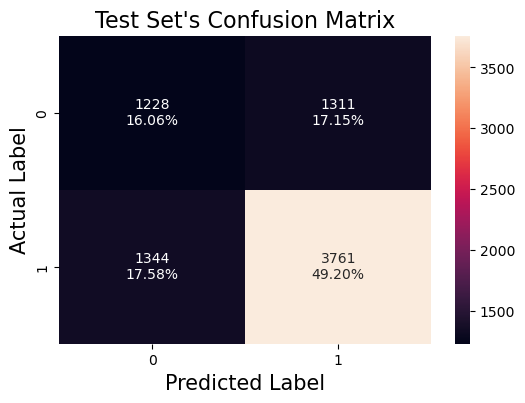

In [114]:
# Create confusion matrix based on test data set
make_confusion_matrix(dcsn_tree)

# Check performance of model on both training and test data sets
perf_dcsn_tree = get_metrics_score(dcsn_tree)
perf_dcsn_tree

In [116]:
# Choose type of classifier
tnd_dcsn_tree = DecisionTreeClassifier(random_state=1)

# Form grid of parameters to search in
#grid_para = {
#    "class_weight": ["balanced", None],
#    "max_depth": np.arange(2, 21, 2),
#    "max_leaf_nodes": np.arange(2, 21, 2),
#    "min_samples_split": [100, 200, 400, 800],
#    "min_impurity_decrease": [0.0001, 0.001, 0.01],
#}
grid_para = {
    "class_weight": ["balanced", None],
    "max_depth": np.arange(2, 21),
    "max_leaf_nodes": np.arange(2, 21),
    "min_samples_split": [100, 200],
    "min_impurity_decrease": [0.0001, 0.001],
}


# Set type of score used to evaluate performance throughout search
scorer = make_scorer(f1_score)

# Run GridSearch
grid_obj = GridSearchCV(tnd_dcsn_tree, grid_para, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set classifer to best combination of parameters
tnd_dcsn_tree = grid_obj.best_estimator_

# Fit best decision tree to training data
tnd_dcsn_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=19,
                       min_impurity_decrease=0.0001, min_samples_split=200,
                       random_state=1)

,Accuracy,Recall,Precision,F1
Training,0.738002,0.915974,0.748217,0.823640
Test,0.730115,0.914594,0.741582,0.819051


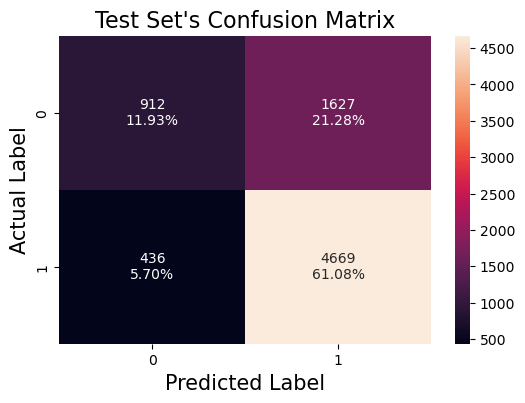

In [118]:
# Create confusion matrix based on test data set
make_confusion_matrix(tnd_dcsn_tree)

# Check performance of model on both training and test data sets
perf_tnd_dcsn_tree = get_metrics_score(tnd_dcsn_tree)
perf_tnd_dcsn_tree

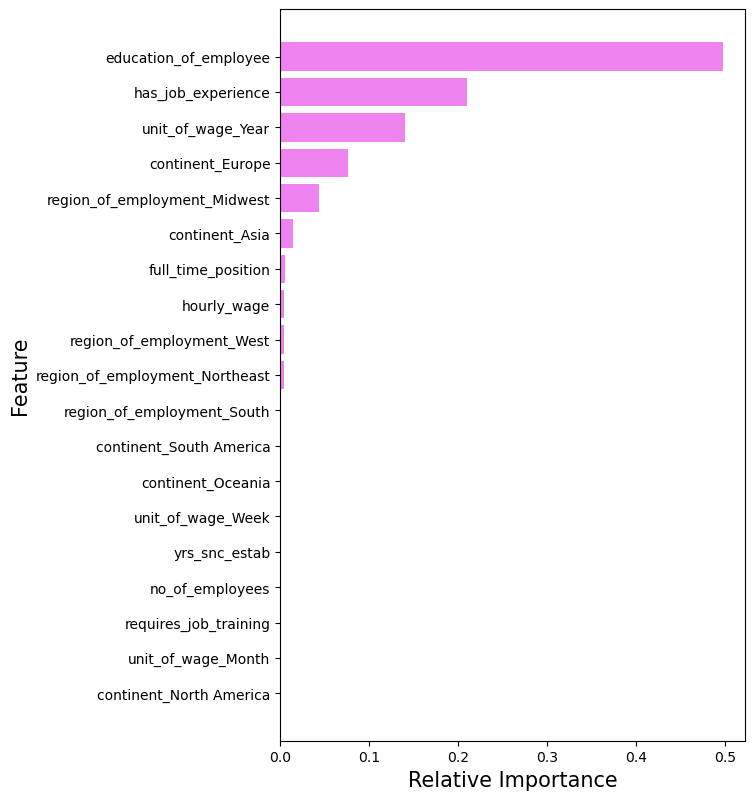

In [120]:
# Create a list of column names - features of tree
col_names = list(X.columns)

# Check importances of various features of tuned tree
importances = tnd_dcsn_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 0.5 * len(col_names)))
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [col_names[i] for i in indices])
plt.xlabel("Relative Importance", fontsize=15)
plt.ylabel("Feature", fontsize=15)
plt.show()

In [122]:
# Use function BaggingClassifier from sklearn to build model
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, Y_train)

BaggingClassifier(random_state=1)

,Accuracy,Recall,Precision,F1
Training,0.984077,0.985562,0.990551,0.98805
Test,0.690345,0.770813,0.766758,0.76878


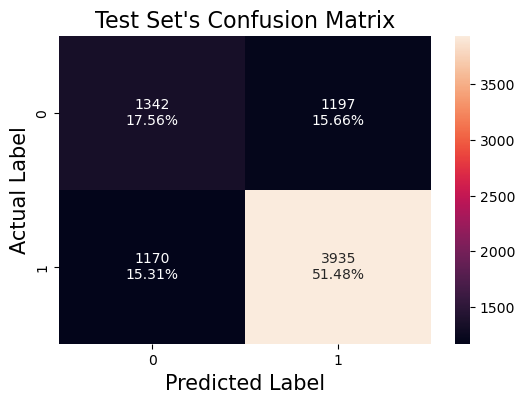

In [124]:
# Create confusion matrix based on test data set
make_confusion_matrix(bagging)

# Check performance of model on both training and test data sets
perf_bagging = get_metrics_score(bagging)
perf_bagging

In [126]:
# Choose type of classifier
tnd_bagging = BaggingClassifier(random_state=1)

# Form grid of parameters to search in
#grid_para = {
#    "max_samples": [0.7, 0.8, 0.9, 1.0],
#    "max_features": [0.7, 0.8, 0.9, 1.0],
#    "n_estimators": np.arange(20, 101, 20),
#}
grid_para = {
    "max_samples": [0.7, 0.8],
    "max_features": [0.7, 0.8],
    "n_estimators": np.arange(20, 101),
}

# Set type of score used to evaluate performance throughout search
scorer = make_scorer(f1_score)

# Run GridSearch
grid_obj = GridSearchCV(tnd_bagging, grid_para, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set classifer to best combination of parameters
tnd_bagging = grid_obj.best_estimator_

# Fit best decision tree to training data
tnd_bagging.fit(X_train, Y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=71,
                  random_state=1)

,Accuracy,Recall,Precision,F1
Training,0.986320,0.998741,0.981117,0.989850
Test,0.730115,0.882076,0.755030,0.813624


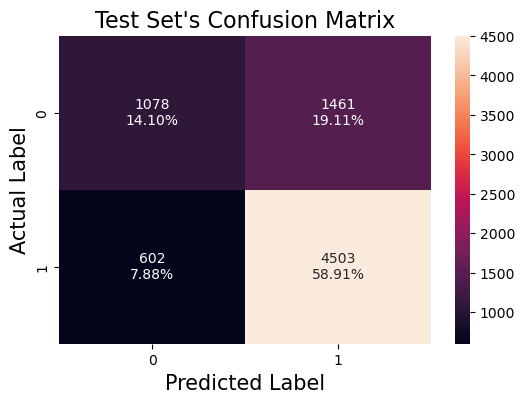

In [127]:
# Create confusion matrix based on test data set
make_confusion_matrix(tnd_bagging)

# Check performance of model on both training and test data sets
perf_tnd_bagging = get_metrics_score(tnd_bagging)
perf_tnd_bagging

In [128]:
# Use function RandomForestClassifier from sklearn to build model
rndm_frst = RandomForestClassifier(random_state=1)
rndm_frst.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

,Accuracy,Recall,Precision,F1
Training,1.000000,1.000000,1.000000,1.00000
Test,0.717949,0.829775,0.766974,0.79714


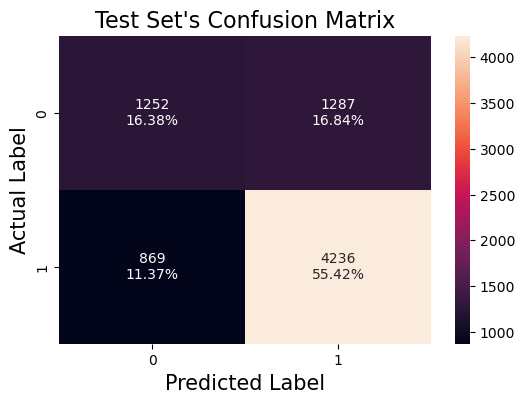

In [129]:
# Create confusion matrix based on test data set
make_confusion_matrix(rndm_frst)

# Check performance of model on both training and test data sets
perf_rndm_frst = get_metrics_score(rndm_frst)
perf_rndm_frst